#분류 알고리즘


분류(Classification)는 학습데이터로 주어진 데이터의 피처와 레이블 값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블값을 예측 하는것

**대표적인 분류 알고리즘**
 - 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
 - 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
 - 데이터 균일도에 따른 규칙 기반의 결정트리(Dicision Tree)
 - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector machine)
 - 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
 - 심층 연결 기반의 신경망(Neural Network)
 - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)



# K-Nearest Neighbors

## iris 꽃 종류 분류를 위한 시각화

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
print('accuracy : {:.2f}'.format(knn.score(X_test,y_test)))

accuracy : 1.00


- 결론
  - KNN의 장단점 그리고 언제 활용을 해야하는지 다음과 같이 심플하게 정리해 보았습니다.

- 장점

  - 쉬운 모델, 쉬운 알고리즘과 이해 (입문자가 샘플데이터를 활용할 때 좋음)
  - 튜닝할 hyperparameter 스트레스가 없음
  - 초기 시도해보기 좋은 시작점이 되는 모델
- 단점

  - 샘플 데이터가 늘어나면 예측시간도 늘어나기 때문에 매우 느려짐
  - pre-processing을 잘하지 않으면 좋은 성능을 기대하기 어려움
  - feature가 많은(수 백개 이상) 데이터셋에서는 좋은 성능을 기대하기 어려움
  - feature의 값이 대부분 0인 데이터셋과는 매우 안좋은 성능을 냄
  - 결론, kaggle과 현업에서는 더 좋은 대안들이 많기 때문에 자주 쓰이는 알고리즘은 아닙니다. 하지만, 초기에 학습을 목표로 해볼 필요는 있습니다!

# Navie Bayes(나이브 베이즈 분류)

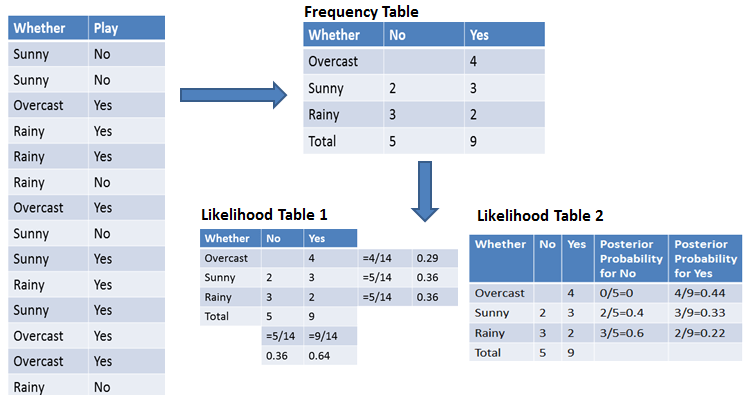

날씨에 따라 축구를 했는지 안했는지에 대한 과거 데이터입니다. 이 과거 데이터를 먼저 Training 시켜 모델을 만든 뒤 그 모델을 기반으로 어떤 날씨가 주어졌을 때 축구를 할지 안 할지 판단하는 것이 목적입니다.

Frequency Table은 주어진 과거 데이터를 횟수로 표현한 것입니다. Likelihood Table 1은 각 Feature (여기서는 날씨)에 대한 확률, 각 Label (여기서는 축구를 할지 말지 여부)에 대한 확률을 구한 것입니다. Likelihood Table 2는 각 Feature에 대한 사후 확률을 구한 것입니다.

## Feature가 하나일 때 나이브 베이즈 분류

Q1) 날씨가 Overcast(흐린)일때,

P(Yes|overcast) = P(overcast|Yes) * P(Yes)/P(overcast)

1. 사전확률(Prior Probability)

P(overcast) = 4/14 = 0.29

P(Yes) = 9/14 = 0.64

2. 사후 확률(posterior probability)

P(Overcast|NO) = 0/9 = 0

3. 베이즈 정리 공식에 대입

P(NO|overcast) = P(overcast|NO) * (P(No) / P(overcast)) = 0*(0.36 / 0.29) = 0

즉, 날씨가 Overcast일 때 축구를 할 확률이 0이라는 뜻입니다.

P(Yes|Overcast) = 0.98, P(No|Overcast) = 0입니다. 즉, 날씨가 Overcast일 때 축구를 하는 확률은 0.98, 축구를 하지 않을 확률은 0입니다. 두 확률을 비교한 뒤 더 높은 확률의 Label로 분류를 하면 됩니다. 두 확률을 비교했을 때 'Yes' Label의 확률이 0.98로 더 높습니다. 따라서 나이브 베이즈 분류기는 날씨가 Overcast일 때 축구를 할 것이라고 판단합니다.

## Feature가 Multiple일 때 나이브 베이즈 분류

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FYGLmm%2FbtqwIYLAj80%2FN2C1tFlYC9zNzvUKjy9tgk%2Fimg.png'>


P(Paly=Yes | Weather=Overcast, Temp=Mild) = P(Weather=Overcast, Temp=Mild | Play=Yes) P(Play=Yes) / P(Weather=Overcast, Temp=Mild)

P(Weather=Overcast, Temp=Mild | Play=Yes) = P(Overcast|Yes) P(Mild|Yes)

P(Weather=Overcast, Temp=Mild) = P(Weather=Overcast) P(Temp=Mild) = (4/14) * (6/14) = 0.1224

1. 사전 확률

P(Yes) = 9/14 = 0.64

2. 사후 확률

P(Overcast|Yes) = 4/9 = 0.44

P(Mild|Yes) = 4/9 = 0.44

3. 베이즈 공식에 대입

P(Weather=Overcast, Temp=Mild | Play=Yes) = P(Overcast|Yes) P(Mild|Yes) = 0.44 * 0.44 = 0.1936

P(Paly=Yes | Weather=Overcast, Temp=Mild) = P(Weather=Overcast, Temp=Mild | Play=Yes) P(Play=Yes) / P(Weather=Overcast, Temp=Mild)

= 0.1936 * 0.64 / 0.1224 = 1

문제 2. 날씨가 overcast, 기온이 Mild일 때 경기를 하지 않을 확률은?
P(Paly=No | Weather=Overcast, Temp=Mild) = P(Weather=Overcast, Temp=Mild | Play=No) P(Play=No) / P(Weather=Overcast, Temp=Mild)

P(Weather=Overcast, Temp=Mild | Play=No) = P(Overcast|Yes) P(Mild|No)

1. 사전 확률

P(No) = 5/14 = 0.36

2. 사후 확률

P(Overcast|No) = 0/5 = 0

P(Mild|No) = 2/5 = 0.4

3. 베이즈 공식에 대입

P(Weather=Overcast, Temp=Mild | Play=No) = P(Overcast|No) P(Mild|No) = 0 * 0.4 = 0

P(Paly=No | Weather=Overcast, Temp=Mild) = P(Weather=Overcast, Temp=Mild | Play=No) P(Play=No) / P(Weather=Overcast, Temp=Mild)

= 0 * 0.36 / 0.1224 = 0

축구를 할 확률은 1이고, 축구를 하지 않을 확률은 0입니다. 축구를 할 확률이 더 크기 때문에 날씨가 Overcast이고 기온이 Mild일 때는 축구를 할 것이라고 분류합니다. 이렇듯 나이브 베이즈는 베이즈 정리를 활용하여 확률이 더 큰 Label로 분류를 합니다.

## Scikit-learn을 활용한 나이브 베이즈 분류기 구축

In [ ]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [ ]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
#Combinig weather and temp into single listof tuples
features = zip(weather_encoded,temp_encoded)
features = list(features)
print(features)


[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted) # 1: Yes

Predicted Value: [1]


아까 베이즈 정리를 활용하여 직접 계산했을 때, 날씨가 Overcast, 기온이 Mild일 때 play로 예측을 했습니다. sklearn의 naive_bayes에서도 동일한 결과가 나옵니다. 1이 Play를 한다입니다.

### Label이 여러개인 나이브 베이즈

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [ ]:
wine.data.shape

(178, 13)

In [ ]:
wine.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


나이브 베이즈의 장단점


- 장점

1. 간단하고, 빠르며, 정확한 모델입니다.

2. computation cost가 작습니다. (따라서 빠릅니다.)

3. 큰 데이터셋에 적합합니다.

4. 연속형보다 이산형 데이터에서 성능이 좋습니다.

5. Multiple class 예측을 위해서도 사용할 수 있습니다.

- 단점

 - feature 간의 독립성이 있어야 합니다. 하지만 실제 데이터에서 모든 feature가 독립인 경우는 드뭅니다. 장점이 많지만 feature가 서로 독립이어야 한다는 크리티컬한 단점이 있습니다.

 - feature간 독립성이 있다는 말은 feature간에 서로 상관관계가 없다는 뜻입니다. X1과 X2라는 feature가 있을 때 X1이 증가하면 X2도 같이 증가한다고 합시다. 그럼 X1과 X2는 서로 상관관계가 있다고 말할 수 있고, 이는 X1과 X2가 독립성이 없다는 뜻입니다. X1과 X2가 독립성이 있으려면 X1이 증가하든 말든, X2에는 아무런 영향을 미치지 않아야 합니다. 하지만 우리가 얻을 수 있는 데이터에서는 feature간의 독립성이 항상 보장되지는 않습니다. 나이브 베이즈 모델은 feature간 독립성이 있다는 가정하에 성립되는 모델이기 때문에 실생활에서 바로 적용하기는 어려움있습니다.



 **결정트리와 앙상블**
 - 결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘. 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하여, 이로 인한 과적합(Overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있습니다.

 - 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용. 앙상블은 매우 많은 여러개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)을 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시키는데, 결정트리가 좋은 약한 학습기가 되기 때문(GBM, LightGBM etc)


# 결정트리(Dicision Tree)

- 일반적으로 쉽게 표현하는 방법은 if/else 로 스무고개 게임을 한다고 생각하면 된다.


- 결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델 중 하나입니다. 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습합니다. 매, 펭귄, 돌고래, 곰을 구분한다고 생각해봅시다. 매와 펭귄은 날개를 있고, 돌고래와 곰은 날개가 없습니다. '날개가 있나요?'라는 질문을 통해 매, 펭귄 / 돌고래, 곰을 나눌 수 있습니다. 매와 펭귄은 '날 수 있나요?'라는 질문으로 나눌 수 있고, 돌고래와 곰은 '지느러미가 있나요?'라는 질문으로 나눌 수 있습니다. 

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png' width=700 height=300>
</figure>

특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델이라고 함.

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdy5OwG%2FbtqDwdHofoT%2FNtDy9lqXkhWTRTwEz6txd0%2Fimg.png' width=700 height=300>
</figure>

많은 규칙이 있으면 분류를 결정하는 방식이 복잡해짐-> 과적합으로 이어지기 쉬움

**결론 :트리가 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음.** 
참고 : https://jaaamj.tistory.com/21



### 데이터의 균일도

<figure>
    <img src='https://blog.kakaocdn.net/dn/dhoo7N/btqDvzqEhPH/QdOsfkqc2hcwHISIh0peo1/img.png' width=700 height=300>
</figure>

참고 : https://jaaamj.tistory.com/21

위 그림에서는 C > B > A 순으로 균일도가 높다고 할 수 있습니다. C는 모두 파란색 공으로 데이터가 모두 균일한 상태입니다. B의 경우는 일부의 하얀색 공을 가지고 있지만 대부분 파란색 공으로 구성되어 있어 C다음으로 균일도가 높습니다


이러한 데이터 세트에서 균일도는 데이터를 구분하는데 있어서 필요한 정보의 양에 영향을 미치게 됩니다.

 

정보의 균일도를 측정하는 대표적인 방법에는 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니계수가 있습니다.

### 불순도(Impurity)


불순도(Impurity)란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻합니다. 아래 그림에서 위쪽 범주는 불순도가 낮고, 아래쪽 범주는 불순도가 높습니다. 바꾸어 말하면 위쪽 범주는 순도(Purity)가 높고, 아래쪽 범주는 순도가 낮습니다. 위쪽 범주는 다 빨간점인데 하나만 파란점이므로 불순도가 낮다고 할 수 있습니다. 반면 아래쪽 범주는 5개는 파란점, 3개는 빨간점으로 서로 다른 데이터가 많이 섞여 있어 불순도가 높습니다.


<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqLXhZ%2FbtqwWyZl6iV%2FUZnQbf9L5HAFzf6hFfxK71%2Fimg.png' width=400 height=300>
</figure>


출처: ratsgo's blog



한 범주에 하나의 데이터만 있다면 불순도가 최소(혹은 순도가 최대)이고, 한 범주 안에 서로 다른 두 데이터가 정확히 반반 있다면 불순도가 최대(혹은 순도가 최소)입니다. 결정 트리는 불순도를 최소화(혹은 순도를 최대화)하는 방향으로 학습을 진행합니다.

엔트로피(Entropy)는 불순도(Impurity)를 수치적으로 나타낸 척도입니다. 엔트로피가 높다는 것은 불순도가 높다는 뜻이고, 엔트로피가 낮다는 것은 불순도가 낮다는 뜻입니다. 엔트로피가 1이면 불순도가 최대입니다. 즉, 한 범주 안에 서로 다른 데이터가 정확히 반반 있다는 뜻입니다. 엔트로피가 0이면 불순도는 최소입니다. 한 범주 안에 하나의 데이터만 있다는 뜻입니다. 엔트로피를 구하는 공식은 아래와 같습니다

<figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FpL6pO%2FbtqwVDN1V94%2FTYgn5iFrPTfgdVwZhxVKl1%2Fimg.png' width=500 height=100>
</figure>

**Pi = 한 영역 안에 존재하는 데이터 가운데 범주 i에 속하는 데이터의 비율**






#### 정보 이득(Information Gain)

정보 이득은 엔트로피라는 개념을 기반으로 함. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 즉, 1-엔트로피 지수. 결정트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할


#### 지니 계수(Gini Index)

원래 결제학에서 불평등 지수를 나타낼 때 사용하는 계수. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등함. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석 되어, 계수가 낮은 속성을 기준으로 분할.

순도와 관련해 부연설명을 드리면 A 영역에 속한 모든 레코드가 동일한 범주에 속할 경우(=불확실성 최소=순도 최대) 엔트로피는 0입니다. 반대로 범주가 둘뿐이고 해당 개체의 수가 동일하게 반반씩 섞여 있을 경우(=불확실성 최대=순도 최소) 엔트로피는 1의 값을 갖습니다. 엔트로피 외에 불순도 지표로 많이 쓰이는 지니계수(Gini Index) 공식은 아래와 같습니다.


<figure>
<img src='https://qph.fs.quoracdn.net/main-qimg-690a5cee77c5927cade25f26d1e53e77' width=500 height=500>
</figure>



아래는 범주가 두 개일 때 한쪽 범주에 속한 비율(p)에 따른 불순도의 변화량을 그래프로 나타낸 것입니다. 보시다시피 그 비율이 0.5(두 범주가 각각 반반씩 섞여 있는 경우)일 때 불순도가 최대임을 알 수가 있습니다. 오분류오차(misclassification error)는 따로 설명드리지 않은 지표인데요, 오분류오차는 엔트로피나 지니계수와 더불어 불순도를 측정할 수 있긴 하나 나머지 두 지표와 달리 미분이 불가능한 점 때문에 자주 쓰이지는 않는다고 합니다.


<figure>
<img src='http://i.imgur.com/n3MVwHW.png' width=500 height=500>
</figure>



참고 : ratgo's blog




#####  결정트리 주요 hyperparameter

1. max_depth
 - 트리의 최대 깊이를 규정
 - defualt 는 None.None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 게속 깊이를 증가시킴.
 - 깊이가 깊어지면, min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

2. max_features
 - 최적의 분할을 위해 고려할 최대 피쳐 개수, 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
 - int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임.
 - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수) 즉 ${\sqrt {전체 피처}}$개수 만큼 선정.
 - 'auto'로 지정하면 sqrt와 동일
 - 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
 - 'None'은 전체 피처 선정

3. min_samples_split
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
 - 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
 - 과적합을 제어, 1로 설정하는 경우 분할되는 노드가 많아져서 과적합 가능성 증가
4. min_samples_leaf
 - 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수
 - min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 클래스의 데이터가 극도로 작을 수 있으므로, 이 경우는 작게 설정 필요.

5. max_leaf_nodes
 - 말단 노드(Leaf)의 최대 개수.


**결정트리를 그리가 위해 graphviz를 이용함**\



설치 참고 : https://wiznxt.tistory.com/776

### 예제) 학습데이터는 다음과 같다.

참고 : https://blog.daum.net/geoscience/1312

In [ ]:

# 데이터 정의
data = pd.DataFrame({"no_insects":["True","True","True","False","True","True","True","True","True","False"],
                     "no_dead":["True","True","False","True","True","True","False","False","True","False"],
                     "no_wilting":["True","True","True","True","True","True","False","True","True","True"],
                     "no_diseases":["True","True","False","True","True","True","False","False","True","True"],
                     "tree_health":["Good","Good","Poor","Good","Good","Good","Poor","Poor","Good","Poor"]}, 
                    columns=["no_insects","no_dead","no_wilting","no_diseases","tree_health"])
# 기술 속성(descriptive features)
features = data[["no_insects","no_dead","no_wilting","no_diseases"]]
# 대상 속성(target feature)
target = data["tree_health"]
print(data)


  no_insects no_dead no_wilting no_diseases tree_health
0       True    True       True        True        Good
1       True    True       True        True        Good
2       True   False       True       False        Poor
3      False    True       True        True        Good
4       True    True       True        True        Good
5       True    True       True        True        Good
6       True   False      False       False        Poor
7       True   False       True       False        Poor
8       True    True       True        True        Good
9      False   False       True        True        Poor


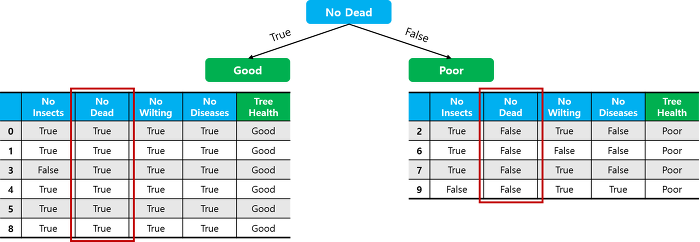

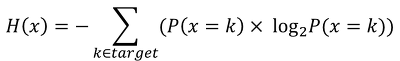

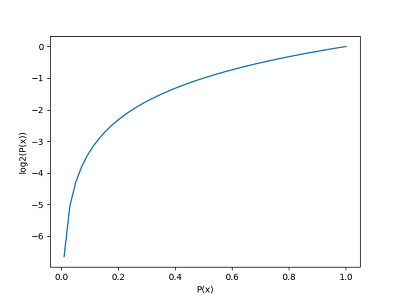

In [ ]:
# 엔트로피
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts = True)
    entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


image.png

정보 이득의 공식은 상위 노드의 엔트로피에서 하위 노드의 엔트로피를 뺀 값입니다.

image.png

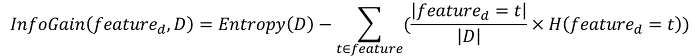

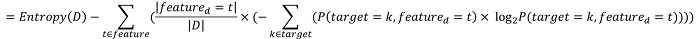

No Insects 속성을 예로 들면, t = {True, False}가 됨.

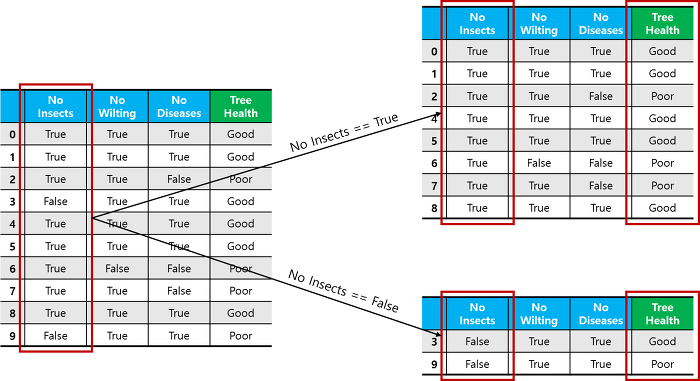

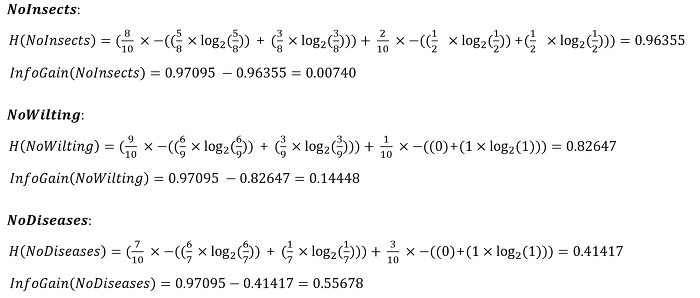

In [ ]:
# 정보이득
def InfoGain(data,split_attribute_name,target_name):
 
    # 전체 엔트로피 계산
    total_entropy = entropy(data[target_name])
    print('Entropy(D) = ', round(total_entropy, 5))
    
    # 가중 엔트로피 계산
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*
                               entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])
                               for i in range(len(vals))])
    print('H(', split_attribute_name, ') = ', round(Weighted_Entropy, 5))
 
    
    # 정보이득 계산
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
 
 
print('InfoGain( no_insects ) = ', round(InfoGain(data, "no_insects", "tree_health"), 5), '\n')
print('InfoGain( no_wilting ) = ', round(InfoGain(data, "no_wilting", "tree_health"), 5), '\n')
print('InfoGain( no_diseases ) = ', round(InfoGain(data, "no_diseases", "tree_health"), 5))

Entropy(D) =  0.97095
H( no_insects ) =  0.96355
InfoGain( no_insects ) =  0.0074 

Entropy(D) =  0.97095
H( no_wilting ) =  0.82647
InfoGain( no_wilting ) =  0.14448 

Entropy(D) =  0.97095
H( no_diseases ) =  0.41417
InfoGain( no_diseases ) =  0.55678


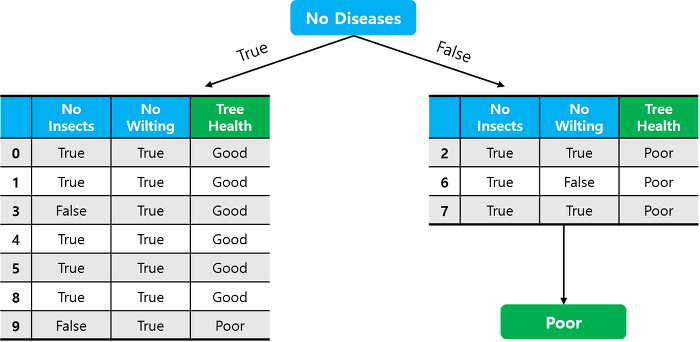

계산방식은 아래와 같습니다.

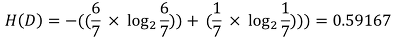

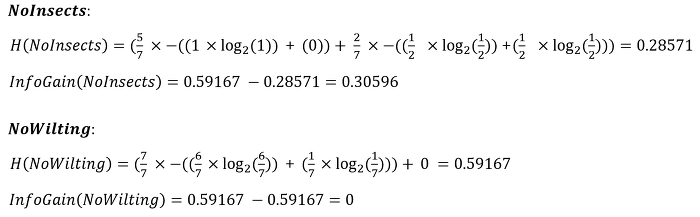

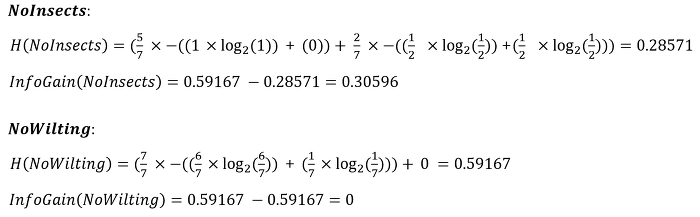

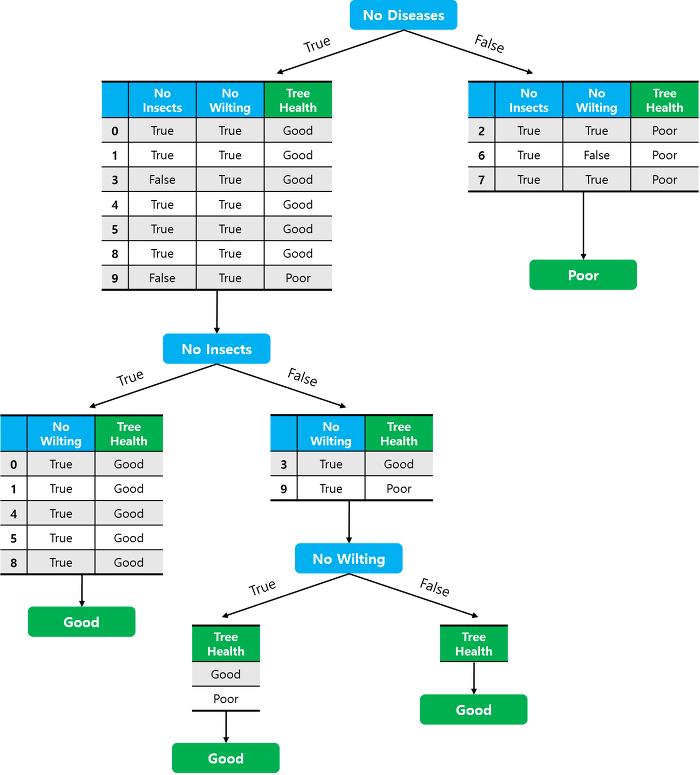

In [ ]:
# ID3 알고리즘
def ID3(data,originaldata,features,target_attribute_name,parent_node_class = None):
 
    # 중지기준 정의
 
    # 1. 대상 속성이 단일값을 가지면: 해당 대상 속성 반환
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
 
    # 2. 데이터가 없을 때: 원본 데이터에서 최대값을 가지는 대상 속성 반환
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])\
               [np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]
 
    # 3. 기술 속성이 없을 때: 부모 노드의 대상 속성 반환
    elif len(features) ==0:
        return parent_node_class
 
    # 트리 성장
    else:
        # 부모노드의 대상 속성 정의(예: Good)
        parent_node_class = np.unique(data[target_attribute_name])\
                            [np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]
        
        # 데이터를 분할할 속성 선택
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        # 트리 구조 생성
        tree = {best_feature:{}}
        
        # 최대 정보이득을 보인 기술 속성 제외
        features = [i for i in features if i != best_feature]
        
        # 가지 성장
        for value in np.unique(data[best_feature]):
            # 데이터 분할. dropna(): 결측값을 가진 행, 열 제거
            sub_data = data.where(data[best_feature] == value).dropna()
            
            # ID3 알고리즘
            subtree = ID3(sub_data,data,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
            
        return(tree)


In [ ]:
# numpy.unique: 고유값 반환
print('numpy.unique: ', np.unique(data["tree_health"], return_counts = True)[1])
# numpy.max: 최대값 반환
print('numpy.max: ', np.max(np.unique(data["tree_health"], return_counts = True)[1]))
# numpy.argmax: 최대값이 위치한  인덱스 반환
print('numpy.argmax: ', np.argmax(np.unique(data["tree_health"], return_counts = True)[1]))

numpy.unique:  [6 4]
numpy.max:  6
numpy.argmax:  0


In [ ]:
tree = ID3(data, data, ["no_insects","no_wilting","no_diseases"], "tree_health")
from pprint import pprint
pprint(tree)


Entropy(D) =  0.97095
H( no_insects ) =  0.96355
Entropy(D) =  0.97095
H( no_wilting ) =  0.82647
Entropy(D) =  0.97095
H( no_diseases ) =  0.41417
Entropy(D) =  0.59167
H( no_insects ) =  0.28571
Entropy(D) =  0.59167
H( no_wilting ) =  0.59167
Entropy(D) =  1.0
H( no_wilting ) =  1.0
{'no_diseases': {'False': 'Poor',
                 'True': {'no_insects': {'False': {'no_wilting': {'True': 'Good'}},
                                         'True': 'Good'}}}}


In [ ]:
!pip install graphviz
!pip install mglearn

     |████████████████████████████████| 542kB 5.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=053ab527b4319b142348a3aae5c2a199ac8cb18f9aa3e8eeb9a86f9f92c0565e
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


## Building decision trees

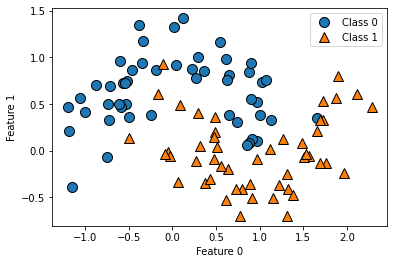

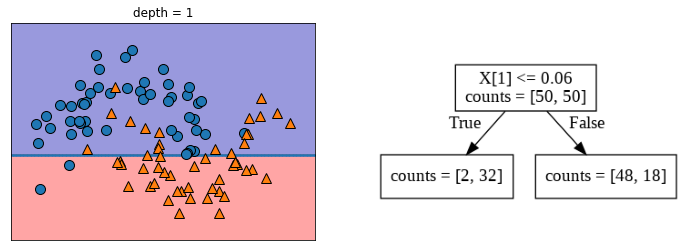

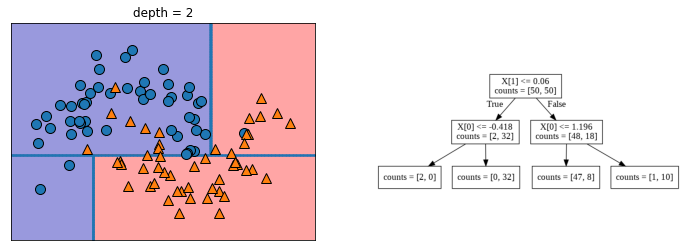

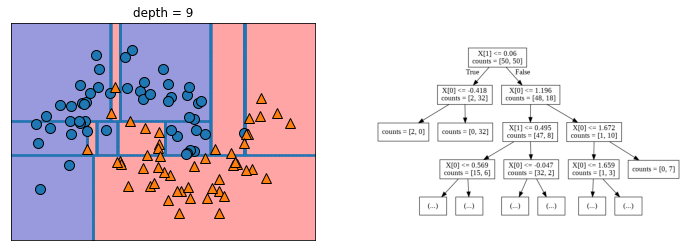

In [ ]:
import mglearn
mglearn.plots.plot_tree_progressive()

# 결정 트리 모델의 시각화(Decision Tree Visualiozation)

참고 : 파이썬 완벽 가이드

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(min_samples_leaf=6,random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

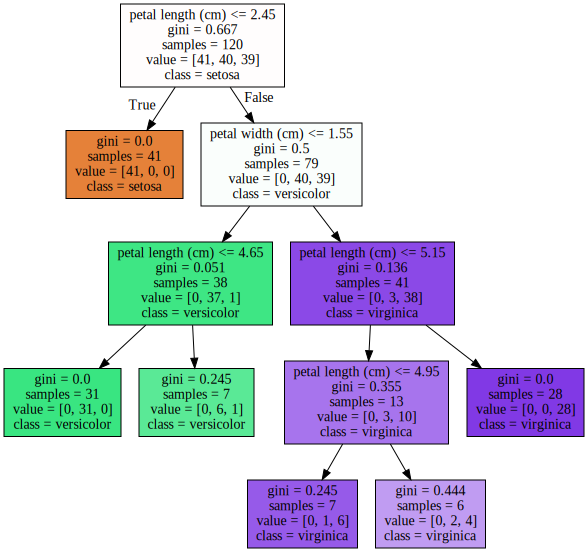

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.    0.    0.567 0.433]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.567
petal width (cm) : 0.433


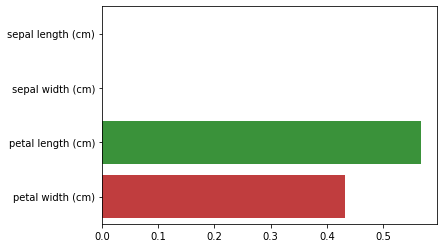

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

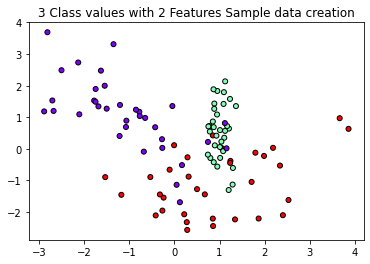

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

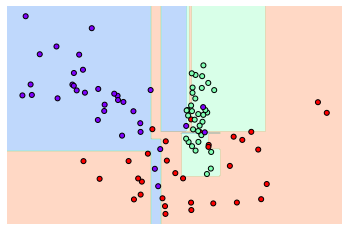

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

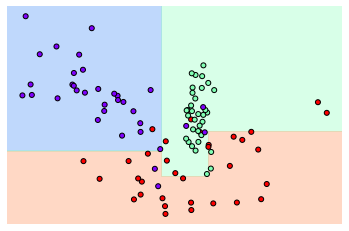

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

#### 결정 트리에ㅐ서의 과대 적합을 막는 전략은 두가지가 있음.

1. 트리 생성을 일찍 중단시키는 전략(사전 가지치기(Pre-pruning)



<figure>
<img src='http://i.imgur.com/MVFcKwz.png' width=500 height=500>
</figure>



2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나, 병합하는 전략.

- Scickit-learn에서 결정트리는 DecisionTree Regressor와 DecisionTreeClassifier이 구현 되어 있음



#### 유방암 데이터로 살펴보는 Dicision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split



cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # stratify : target:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


- 결정 트리 분석

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

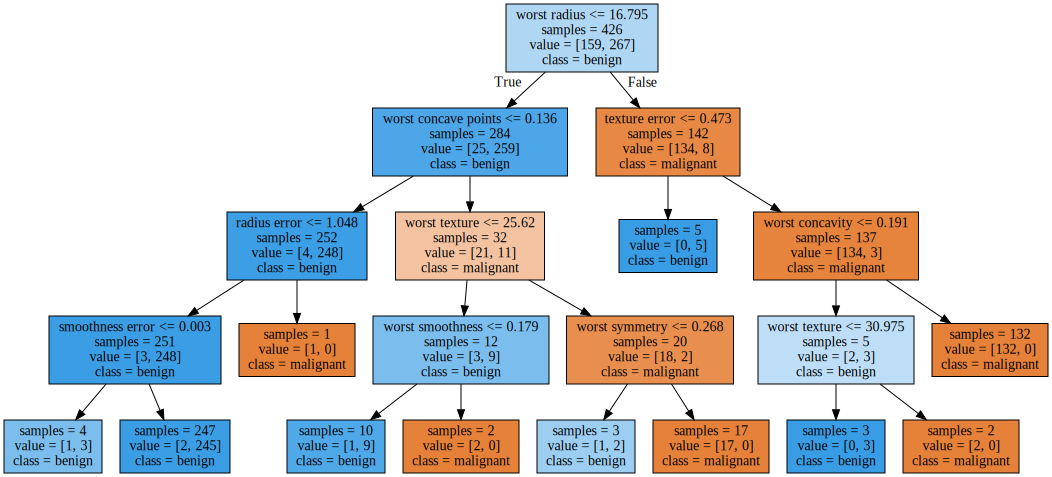

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- Feature Importance in trees

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


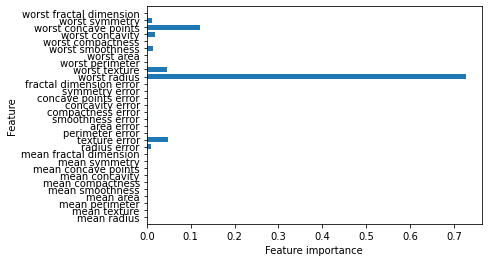

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


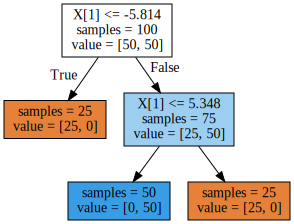

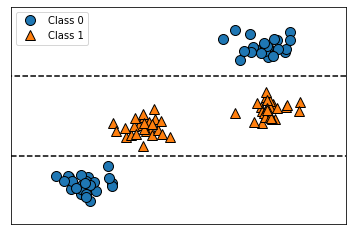

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- 컴퓨터 메모리 각격 동향 데이터셋

x축이 날짜,y축은 해당 년도의 램(RAM) 1메가바이트당 가격

Text(0, 0.5, 'Price in $/Mbyte')

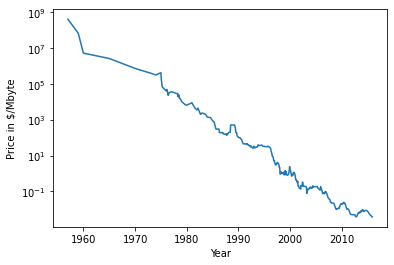

In [ ]:
import os
import pandas as pd
import numpy as np

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

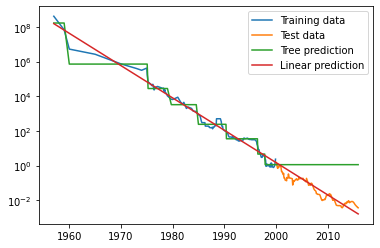

In [ ]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#사이킷런 알고리즘 치크시트


<figure>
    <img src=https://imyeonn.github.io/assets/images/post/002/165_01.png height=300>
</figure>





## CART(Classification And Regression Tree)

-예측 및 분류 문제를 Tree로 문제 풀 수 있음.
- Tree가 많아질수록 Overfitting 초래(= high variance, low bias)

- CART 알고리즘은 지니 지수(Gini Index) 또는 분산의 감소량을 사용하여 나무의 가지를 이진(Binary) 분리한다. (범주형 변수에 대해서는 지니 지수를 사용하고, 연속형 변수에 대해서는 분산의 감소량을 사용한다.)
참고자료 : 사례로 배우는 데이터마이닝 [자유아카데미, 최종후/소선하] p.28





| 알고리즘 | 평가지수(선택방법) | 비고 |
|:---:|:----:|:----|
| ID3 | Entropy | 다지분리(범주) |
| C4.5 | Information Gain | 다지분리(범주) 및 이진분리(수치) |
| C5.0 | 카이제곱(범주), F검정(수치) | 통계적 접근 방식
| CART | Gini index(범주), 분산의 차이(수치) |통계적 접근 방식, 항상 2진 분리|

**알고리즘 차이 참고(*https://leedakyeong.tistory.com/entry/Decision-Tree%EB%9E%80-ID3-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)**


#랜덤 포레스트(Random Forest)

- 오늘날 쓰이는 머신 러닝 알고리즘 중에서 **가장 강력한 성능을 자랑하는 알고리즘**

- 랜덤 포레스트는 이 중 **배깅 방법**을 적용한 결정트리(Dicison Tree)의 앙상블

- 랜덤 포레스트 알고리즘은 **결정트리(Dicision Tree) 분류기 여러 개를 훈련**시켜서 그 결과들을 가지고 예측을 함. 각각의 결정트리를 훈련시킬 때 배깅(Bagging). 즉, 훈련 세트에서 중복을 허용하여 샘플링한 데이터셋을 개별 결정트리 분류기의 훈련 세트로 하여 훈련시키는 방식.


#### 장점 :
1. 분류, 회귀에서 가장 널리 쓰이는 알고리즘으로 성능이 좋고 정확도가 높다
2. 간편하고 빠르다.
3. 큰 데이터 셋에서도 잘 사용되며, 많은 입력 변수들을 다룰 수 있다.

#### 단점 : 
1. 속도와 메모리 비용이 상대적(linear에 비해)으로 큼
(더 많은 트리 -> 정확도는 높아지나 시간과 리소스 소모가 큼)

2. 트리 깊이와 개수 설정을 잘못하여 과적합(Overfiting)발생.




#### 랜덤 포레스튼튼 훈련을 통해 구성해 놓은 다수의 의사결정트리들로부터 분류 결과를 취합해서 예측하는 앙상블 모델이라고 할 수 있음.

<figure>
    <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdQRp2AYzLvDCg88pi6c2CRYQ_6qNBGVDn7A&usqp=CAU' width=700 height=300>
</figure>



##코드 실습
참고 : 파이썬 완벽가이드


##### 배깅(Bagging)

- 통계학에서 중복한 허용한 리샘플링(resampling)을 부트스트래핑(boostraping)이라 하고 이와 반대로 중복을 허용하지 않는 샘플링 방식을 페이스팅(pasting)이라고 함.



ex) 10만개의 데이터 중 7만 5천개의 데이터를 학습데이터로 사용한다고 가정하면

7만 5천개의 데이터를 가지고 여러 데이터 셋으로 나눈다면 학습데이터가 부족해지고 이로인해 모형들이 편향히 생기거나 분산이 커지는 문제가 생길 수 있다.

하지만 배깅의 경우는 복원추출(Resampling)을 하기 때문에 어떤 데이터는 여러번 뽑힐 수 있고 어떤 데이터는 한번도 뽑히지 않을 수도 있다 때문에 75000개의 데이터를 가지고 75000번을 추출해도 75000가지의 서로 다른 샘플데이터를 추출할 수 있게 됨.

이 특성을 이용해 조금씩 다른 모델들을 만들고 그것들의 결과를 취합하는 것이다.

데이터가 비슷하니 결과도 별 차이가 없다고 생각할 수 있지만 데이터가 빼곡해지는 효과가 있고, 조금씩 다른 모델들이 투표를 하는 방식으므로 배깅으로 만들어진 앙상블 모델은 결과들에 대한 편차가 크지 않고 안정적인 결과를 보여지도록 향상됨.

학습데이터가 원래 편향이 있다면 그로 인한 편향문제까지는 해결하지 못하지만 미지의 데이터(Unseen data)에 상당히 괜찮은 성능을 보이고 노이즈나 아웃라이어에 대해서도 강해지는 것으로 알려져 있음.



<figure>
    <img src='https://miro.medium.com/max/1678/1*Wf91XObaX2zwow7mMwDmGw.png' width=700 height=300>
</figure>

출처 : https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

- 이 의사결정나무들은 모두 같은 의사결정나무일 수가 없다

- Bootstrap으로 샘플을 추출했기 때문에, 어느 정도의 중복과 함께 각기 다른 샘플로 의사 결정나무 모델을 만들었다고 할 수 있다.


##  Hyperparameter
- n_estimators: 랜덤 포레스트 안의 결정 트리 갯수

 - n_estimators는 클수록 좋습니다.
 - 결정 트리가 많을수록 더 깔끔한 Decision Boundary가 나오겠죠.
 - 하지만 그만큼 메모리와 훈련 시간이 증가합니다.
Default는 10입니다.
 - max_features: 무작위로 선택할 Feature의 개수

-  max_features=n_features이면 30개의 feature 중 30개의 feature 모두를 선택해 결정 트리를 만듭니다.
단, bootstrap=True이면 30개의 feature에서 복원 추출로 30개를 뽑습니다.
-  특성 선택의 무작위성이 없어질 뿐 샘플링의 무작위성은 그대로인 것입니다.
-  bootstrap=True는 default 값입니다.
-  따라서 max_features 값이 크다면 랜덤 포레스트의 트리들이 매우 비슷해지고, 가장 두드러진 특성에 맞게 예측을 할 것입니다.
-  max_features 값이 작다면 랜덤 포레스트의 트리들이 서로 매우 달라질 것입니다. 따라서 오버피팅이 줄어들 것입니다.
-  max_features는 일반적으로 Defalut 값을 씁니다.
-  max_depth : 트리의 깊이를 뜻합니다.

-  min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수 입니다.

-  min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수 입니다.

-  max_leaf_nodes : 리프노드의 최대 개수




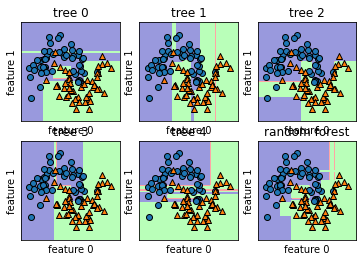

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split



x, y = make_moons(n_samples=100, noise=0.25, random_state=3) # noise: Standard deviation of Gaussian noise added to the data.



x_train, x_test, y_train, y_test = train_test_split(x, y,

                                                    stratify=y, random_state=42)



forest = RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=42) # n_estimators: 사용할 tree수

forest.fit(x_train, y_train)



import matplotlib.pyplot as plt

import numpy as np

from mglearn.plots import plot_2d_classification



_, axes = plt.subplots(2, 3)

marker_set = ['o', '^']



for i, (axe, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):

    axe.set_title('tree {}'.format(i))

    plot_2d_classification(tree, x, fill=True, ax=axe, alpha=0.4)



    for i, m in zip(np.unique(y), marker_set):

        axe.scatter(x[y==i][:, 0], x[y==i][:, 1], marker=m,

                    label='class {}'.format(i), edgecolors='k')

        axe.set_xlabel('feature 0')

        axe.set_ylabel('feature 1')



axes[-1, -1].set_title('random forest')

axes[-1, -1].set_xlabel('feature 0')

axes[-1, -1].set_ylabel('feature 1')

plot_2d_classification(forest, x, fill=True, ax=axes[-1, -1], alpha=0.4)



for i, m in zip(np.unique(y), marker_set):

    plt.scatter(x[y==i][:, 0], x[y==i][:, 1], marker=m,

                label='class {}'.format(i), edgecolors='k')

plt.show()

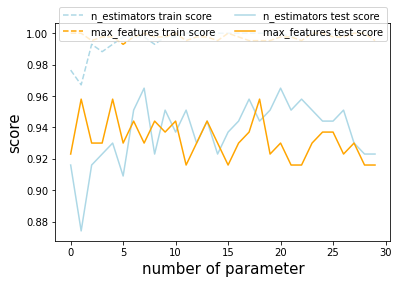

In [ ]:
from sklearn.datasets import load_breast_cancer



cancer = load_breast_cancer()



x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,

                                                    stratify=cancer.target, random_state=0)



n_feature = cancer.data.shape[1]



score_n_tr_est = []

score_n_te_est = []

score_m_tr_mft = []

score_m_te_mft = []



for i in np.arange(1, n_feature+1): # n_estimators와 mat_features는 모두 0보다 큰 정수여야 하므로 1부터 시작합니다.

    params_n = {'n_estimators':i, 'max_features':'auto', 'n_jobs':-1} # **kwargs parameter

    params_m = {'n_estimators':10, 'max_features':i, 'n_jobs':-1}



    forest_n = RandomForestClassifier(**params_n).fit(x_train, y_train)

    forest_m = RandomForestClassifier(**params_m).fit(x_train, y_train)

    

    score_n_tr = forest_n.score(x_train, y_train)

    score_n_te = forest_n.score(x_test, y_test)

    score_m_tr = forest_m.score(x_train, y_train)

    score_m_te = forest_m.score(x_test, y_test)



    score_n_tr_est.append(score_n_tr)

    score_n_te_est.append(score_n_te)

    score_m_tr_mft.append(score_m_tr)

    score_m_te_mft.append(score_m_te)



index = np.arange(len(score_n_tr_est))

plt.plot(index, score_n_tr_est, label='n_estimators train score', color='lightblue', ls='--') # ls: linestyle

plt.plot(index, score_m_tr_mft, label='max_features train score', color='orange', ls='--')

plt.plot(index, score_n_te_est, label='n_estimators test score', color='lightblue')

plt.plot(index, score_m_te_mft, label='max_features test score', color='orange')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),

           ncol=2, fancybox=True, shadow=False) # fancybox: 박스모양, shadow: 그림자

plt.xlabel('number of parameter', size=15)

plt.ylabel('score', size=15)

plt.show()

## 시각화

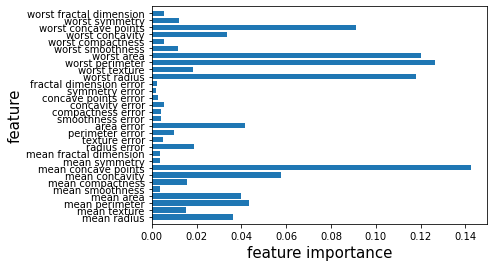

In [ ]:
n_feature = cancer.data.shape[1]

index = np.arange(n_feature)



forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)

forest.fit(x_train, y_train)

plt.barh(index, forest.feature_importances_, align='center')

plt.yticks(index, cancer.feature_names)

plt.ylim(-1, n_feature)

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

# 랜덤 포레스트 예제 (독버섯 구분하기)

데이터 세트 : https://www.kaggle.com/uciml/mushroom-classification

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.shape

(8124, 23)

In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# 인코딩
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for columns in data.columns:
    data[columns] = labelencoder.fit_transform(data[columns])

In [ ]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [ ]:
y = data['class']

In [ ]:
x = data.drop('class' ,axis=1)

In [ ]:
data.corr()

""


In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [ ]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

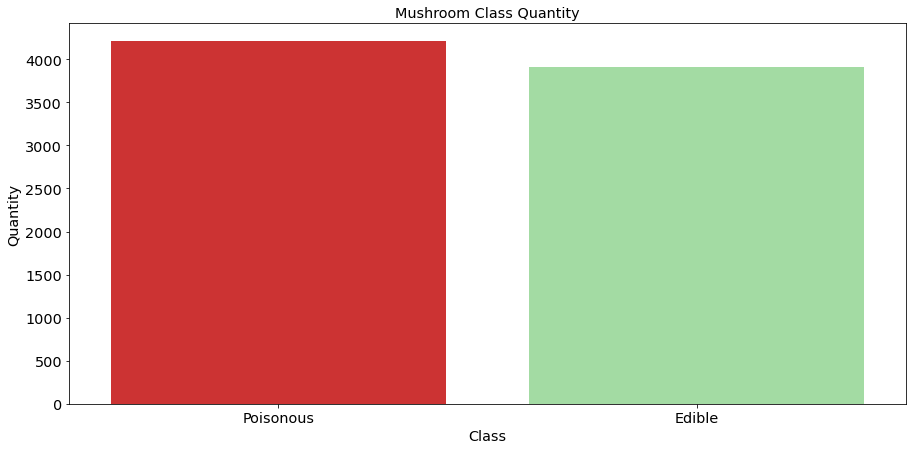

In [ ]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

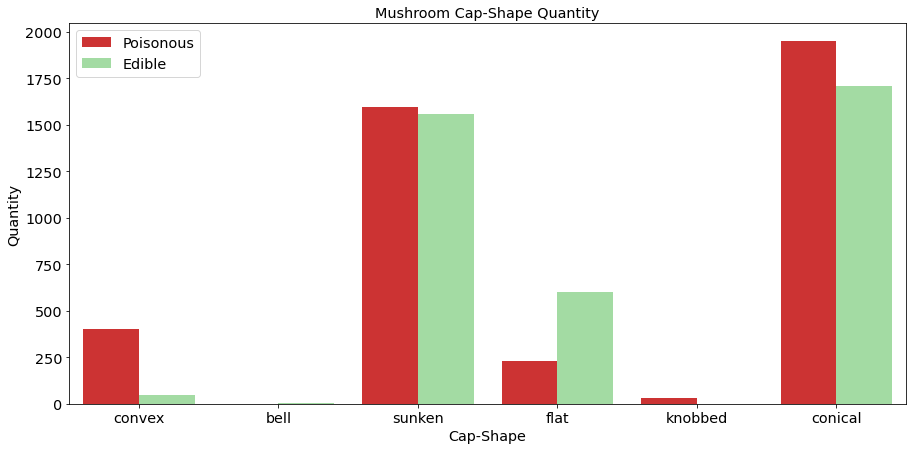

In [ ]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

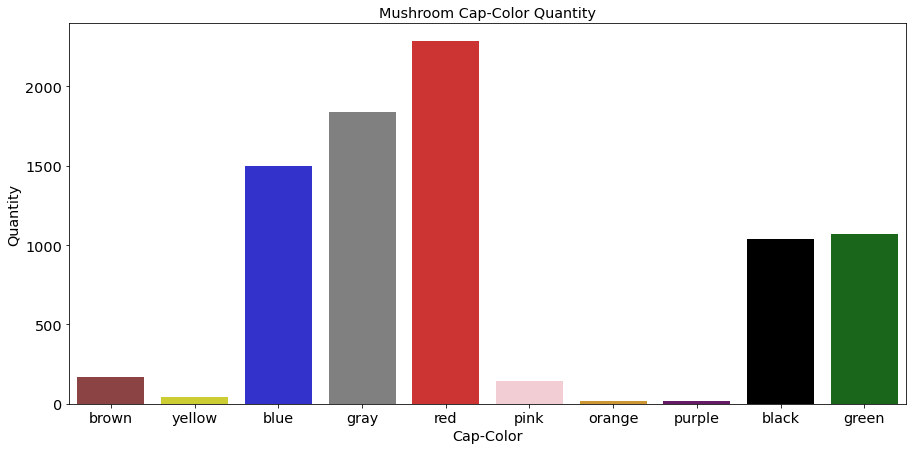

In [ ]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

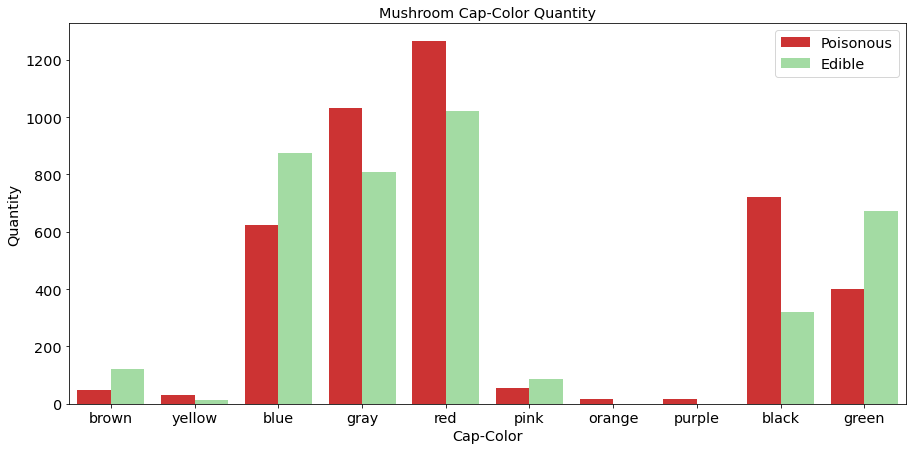

In [ ]:
plot_col(col='cap-color', hue='class', labels=color_dict)

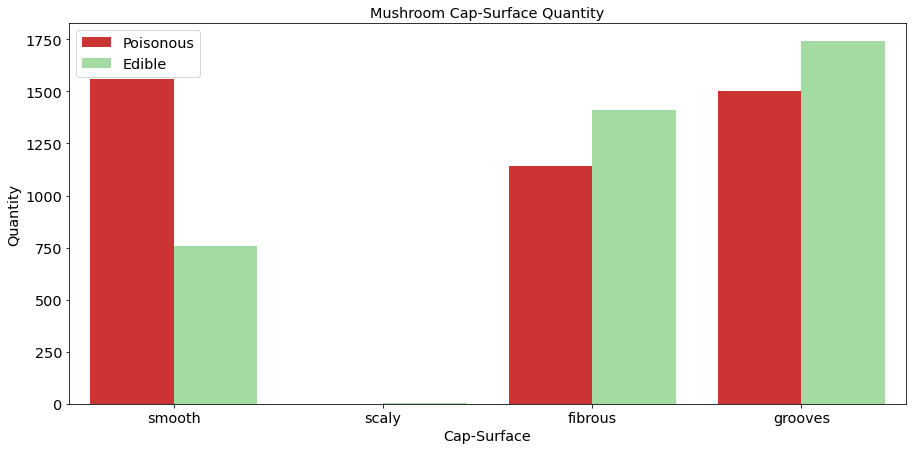

In [ ]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

In [ ]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

Number of mushrooms based on "odor"

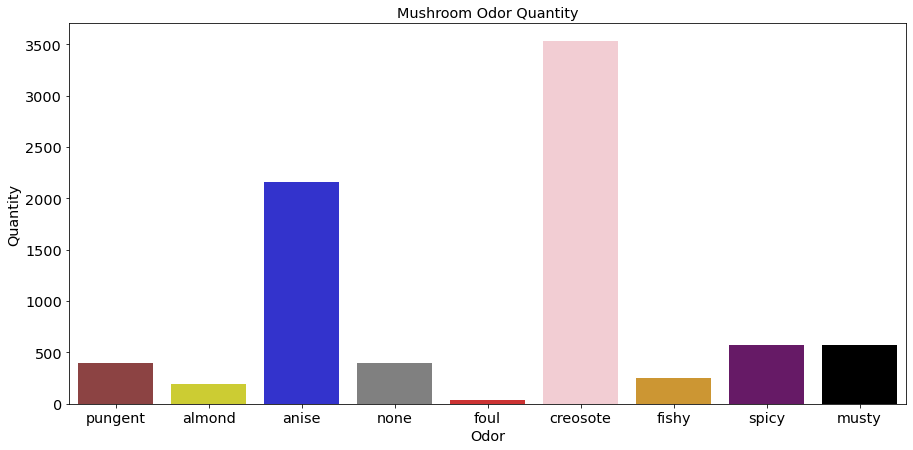

In [ ]:
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
labels = get_labels(order, odor_dict)      
plot_col(col='odor', color=color_dict.keys(), labels=labels)

Plot pairwise relationships in a mushrooms for each stalk categorize.

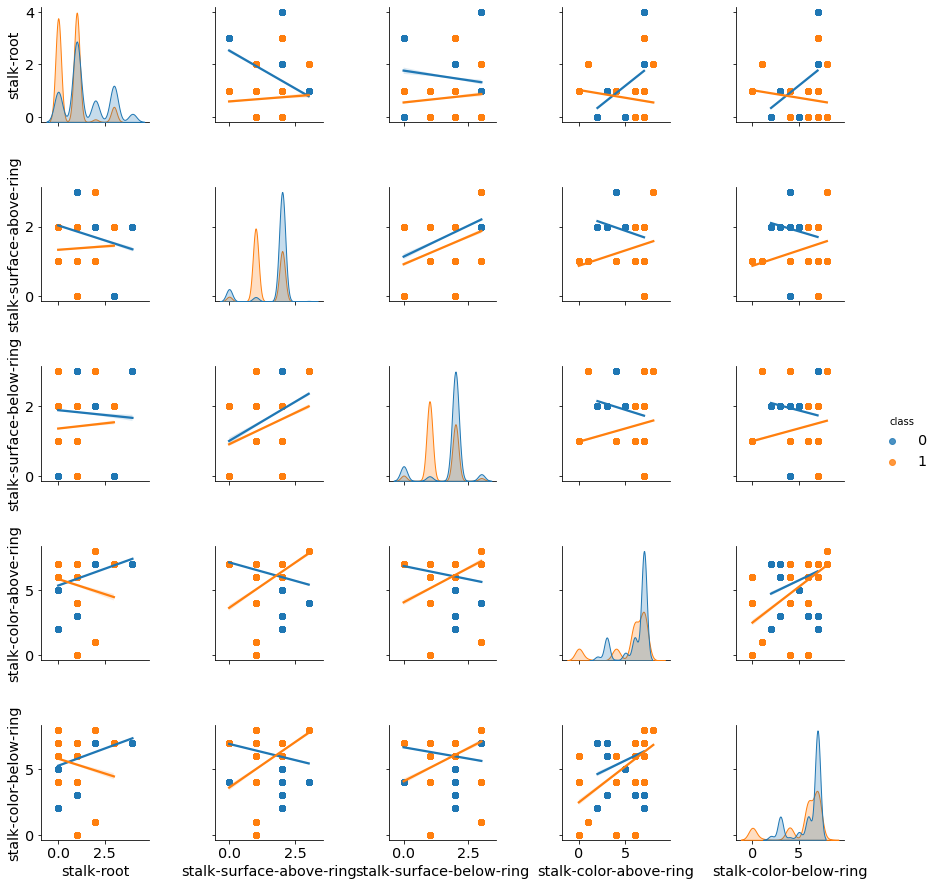

In [ ]:
stalk_cats = ['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
              'stalk-color-above-ring', 'stalk-color-below-ring']
data_cats = data[stalk_cats]
sns.pairplot(data_cats, hue='class', kind='reg')

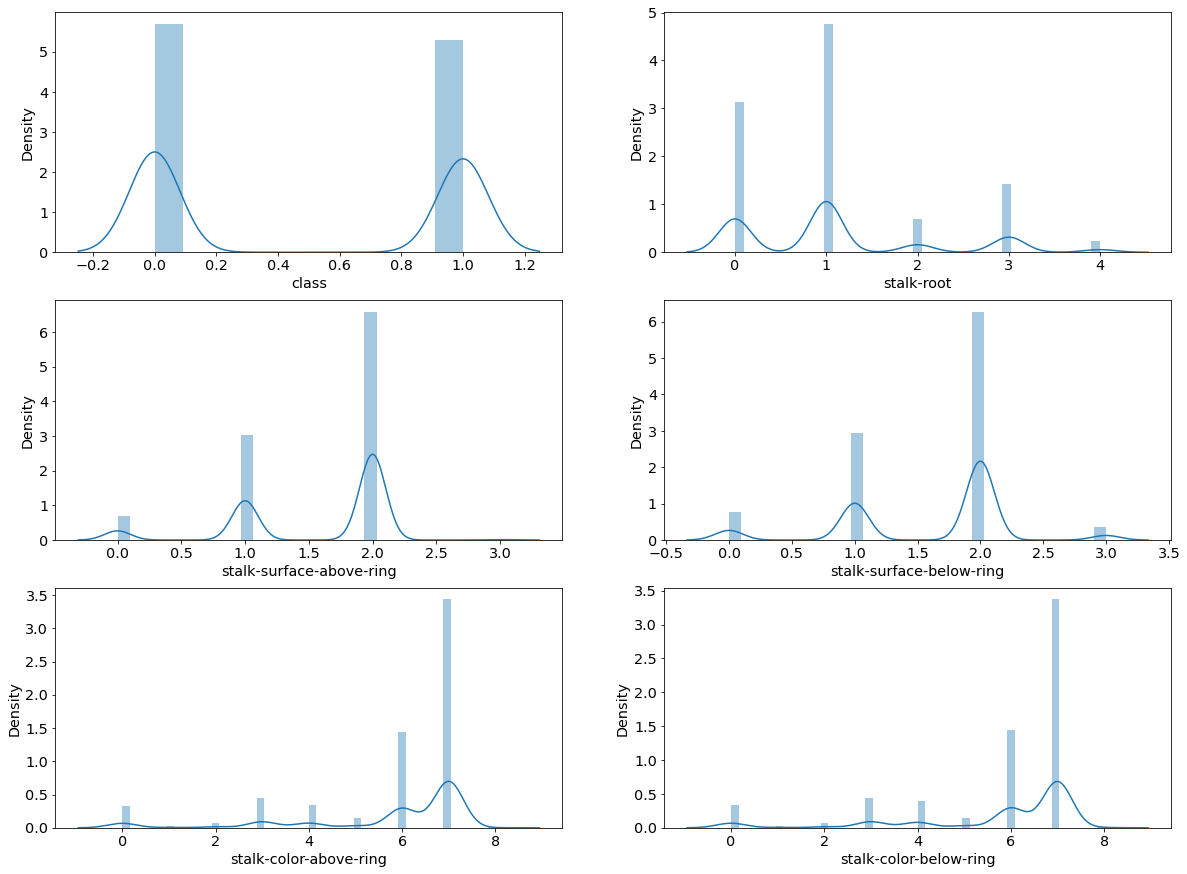

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, axis in enumerate(ax.flat):
    sns.distplot(data_cats.iloc[:, i], ax=axis)

In [ ]:
#graph
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
labels = ['Edible', 'Poison']
values = data['class'].value_counts()

fig=go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#87CEFA', '#7FFF00'],
                              line=dict(color='#FFFFFF',width=3)))
fig.show()

I'ts almost a 50/50 lotery to come across with a poisonous mushroom

In [ ]:
labels = ['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste']
values = data['habitat'].value_counts()
colors = ['#DEB887','#778899', '#B22222', '#FFFF00', 
          '#F8F8FF','#FFE4C4','#FF69B4']

fig=go.Figure(data=[go.Pie(labels=labels,
                           values=values,
                           #marker_colors=labels,
                           pull=[0.1, 0, 0, 0, 0.2, 0, 0])])
fig.update_traces(title='Mushrooms Habitat Percentage',
                  hoverinfo='label+value', 
                  textinfo='percent', 
                  opacity=0.9,
                  textfont_size=20,
                  marker=dict(colors=colors,
                             line=dict(color='#000000', width=0.1)),
                 )
fig.show()


In [ ]:
labels = ['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 
          'Cinnamon', 'Purple', 'Green']
values = data['cap-color'].value_counts()
colors = ['#DEB887','#778899', '#B22222', '#FFFF00', 
          '#F8F8FF','#FFE4C4','#FF69B4','#F0DC82','#C000C5', '#228B22']

fig=go.Figure(data=[go.Pie(labels=labels,
                           values=values,
                           #marker_colors=labels,
                           pull=[0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0])])
fig.update_traces(title='Mushrooms Color Quantity',
                  hoverinfo='label+percent', 
                  textinfo='value',
                  opacity=0.9,
                  textfont_size=20,
                  marker=dict(colors=colors,
                             line=dict(color='#000000', width=0.1)),
                 )
fig.show()

In [ ]:
colors = ['#DEB887','#f8f8ff','#778899', '#FF69B4','#FFFF00','#B22222','#FFE4C4','#F0DC82','#C000C5', '#228B22']
fig = px.histogram(data, x='cap-color',
                   color_discrete_map={'p':'#7FFF00'},
                   #opacity=0.8,
                   color_discrete_sequence=[colors],
                   #barmode='relative',
                   barnorm='percent',
                   color='class'
                  )
fig.update_layout(title='Edible or Poisonous Percent Based on Cap Color',
                  xaxis_title='Cap Color',
                  yaxis_title='Quantity',
                 )

fig.show()

In [ ]:
fig = px.histogram(data, x='odor',
                   color_discrete_map={'p':'#7FFF00', 'e':'#87CEFA'},
                   #opacity=0.8,
#                    color_discrete_sequence='Green',
                   barmode='group',
#                    barnorm='percent',
                   color='class'
                  )
fig.update_layout(title='Edible or Poisonous vs Odor',
                  xaxis_title='Cap Color',
                  yaxis_title='Quantity',
                  #title_x=0.5,
                 )

fig.show()

In [ ]:
fig = px.histogram(data, x='cap-shape',
                   color_discrete_map={'p':'#7FFF00', 'e':'#87CEFA'},
                   #opacity=0.8,
                   color_discrete_sequence=[colors],
                   barmode='group',
                   #barnorm='percent',
                   color='class'
                  )
fig.update_layout(
                  xaxis_title='Cap Shape',
                  yaxis_title='Quantity',
                  #title_x=0.5,
                 )

fig.show()

In [ ]:
gill_cats = ['class', 'gill-size', 'gill-attachment', 'gill-spacing', 'gill-color']
gill_data = data[gill_cats]
gill_corr = gill_data.corr() 
# gill_corr['class'].sort_values(ascending=False)

fig = px.imshow(gill_corr,
                color_continuous_scale = 'Greens',
                color_continuous_midpoint=0,
               )
fig.update_layout(title="Gill Categories Correlation Matrix")
fig.show()

In [ ]:
stalk_cats = ['class', 'stalk-shape', 'stalk-color-below-ring', 'stalk-color-above-ring', 
              'stalk-surface-below-ring', 'stalk-surface-above-ring', 'stalk-root']
stalk_data = data[stalk_cats]
stalk_corr = stalk_data.corr() 
# stalk_corr['class'].sort_values(ascending=False)

fig = px.imshow(stalk_corr,
                color_continuous_scale = 'purples',
                color_continuous_midpoint=0,
               )
fig.update_layout(title="Stalk Categories Correlation Matrix")
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6093, 22) (6093,)
(2031, 22) (2031,)


<Figure size 144x72 with 0 Axes>

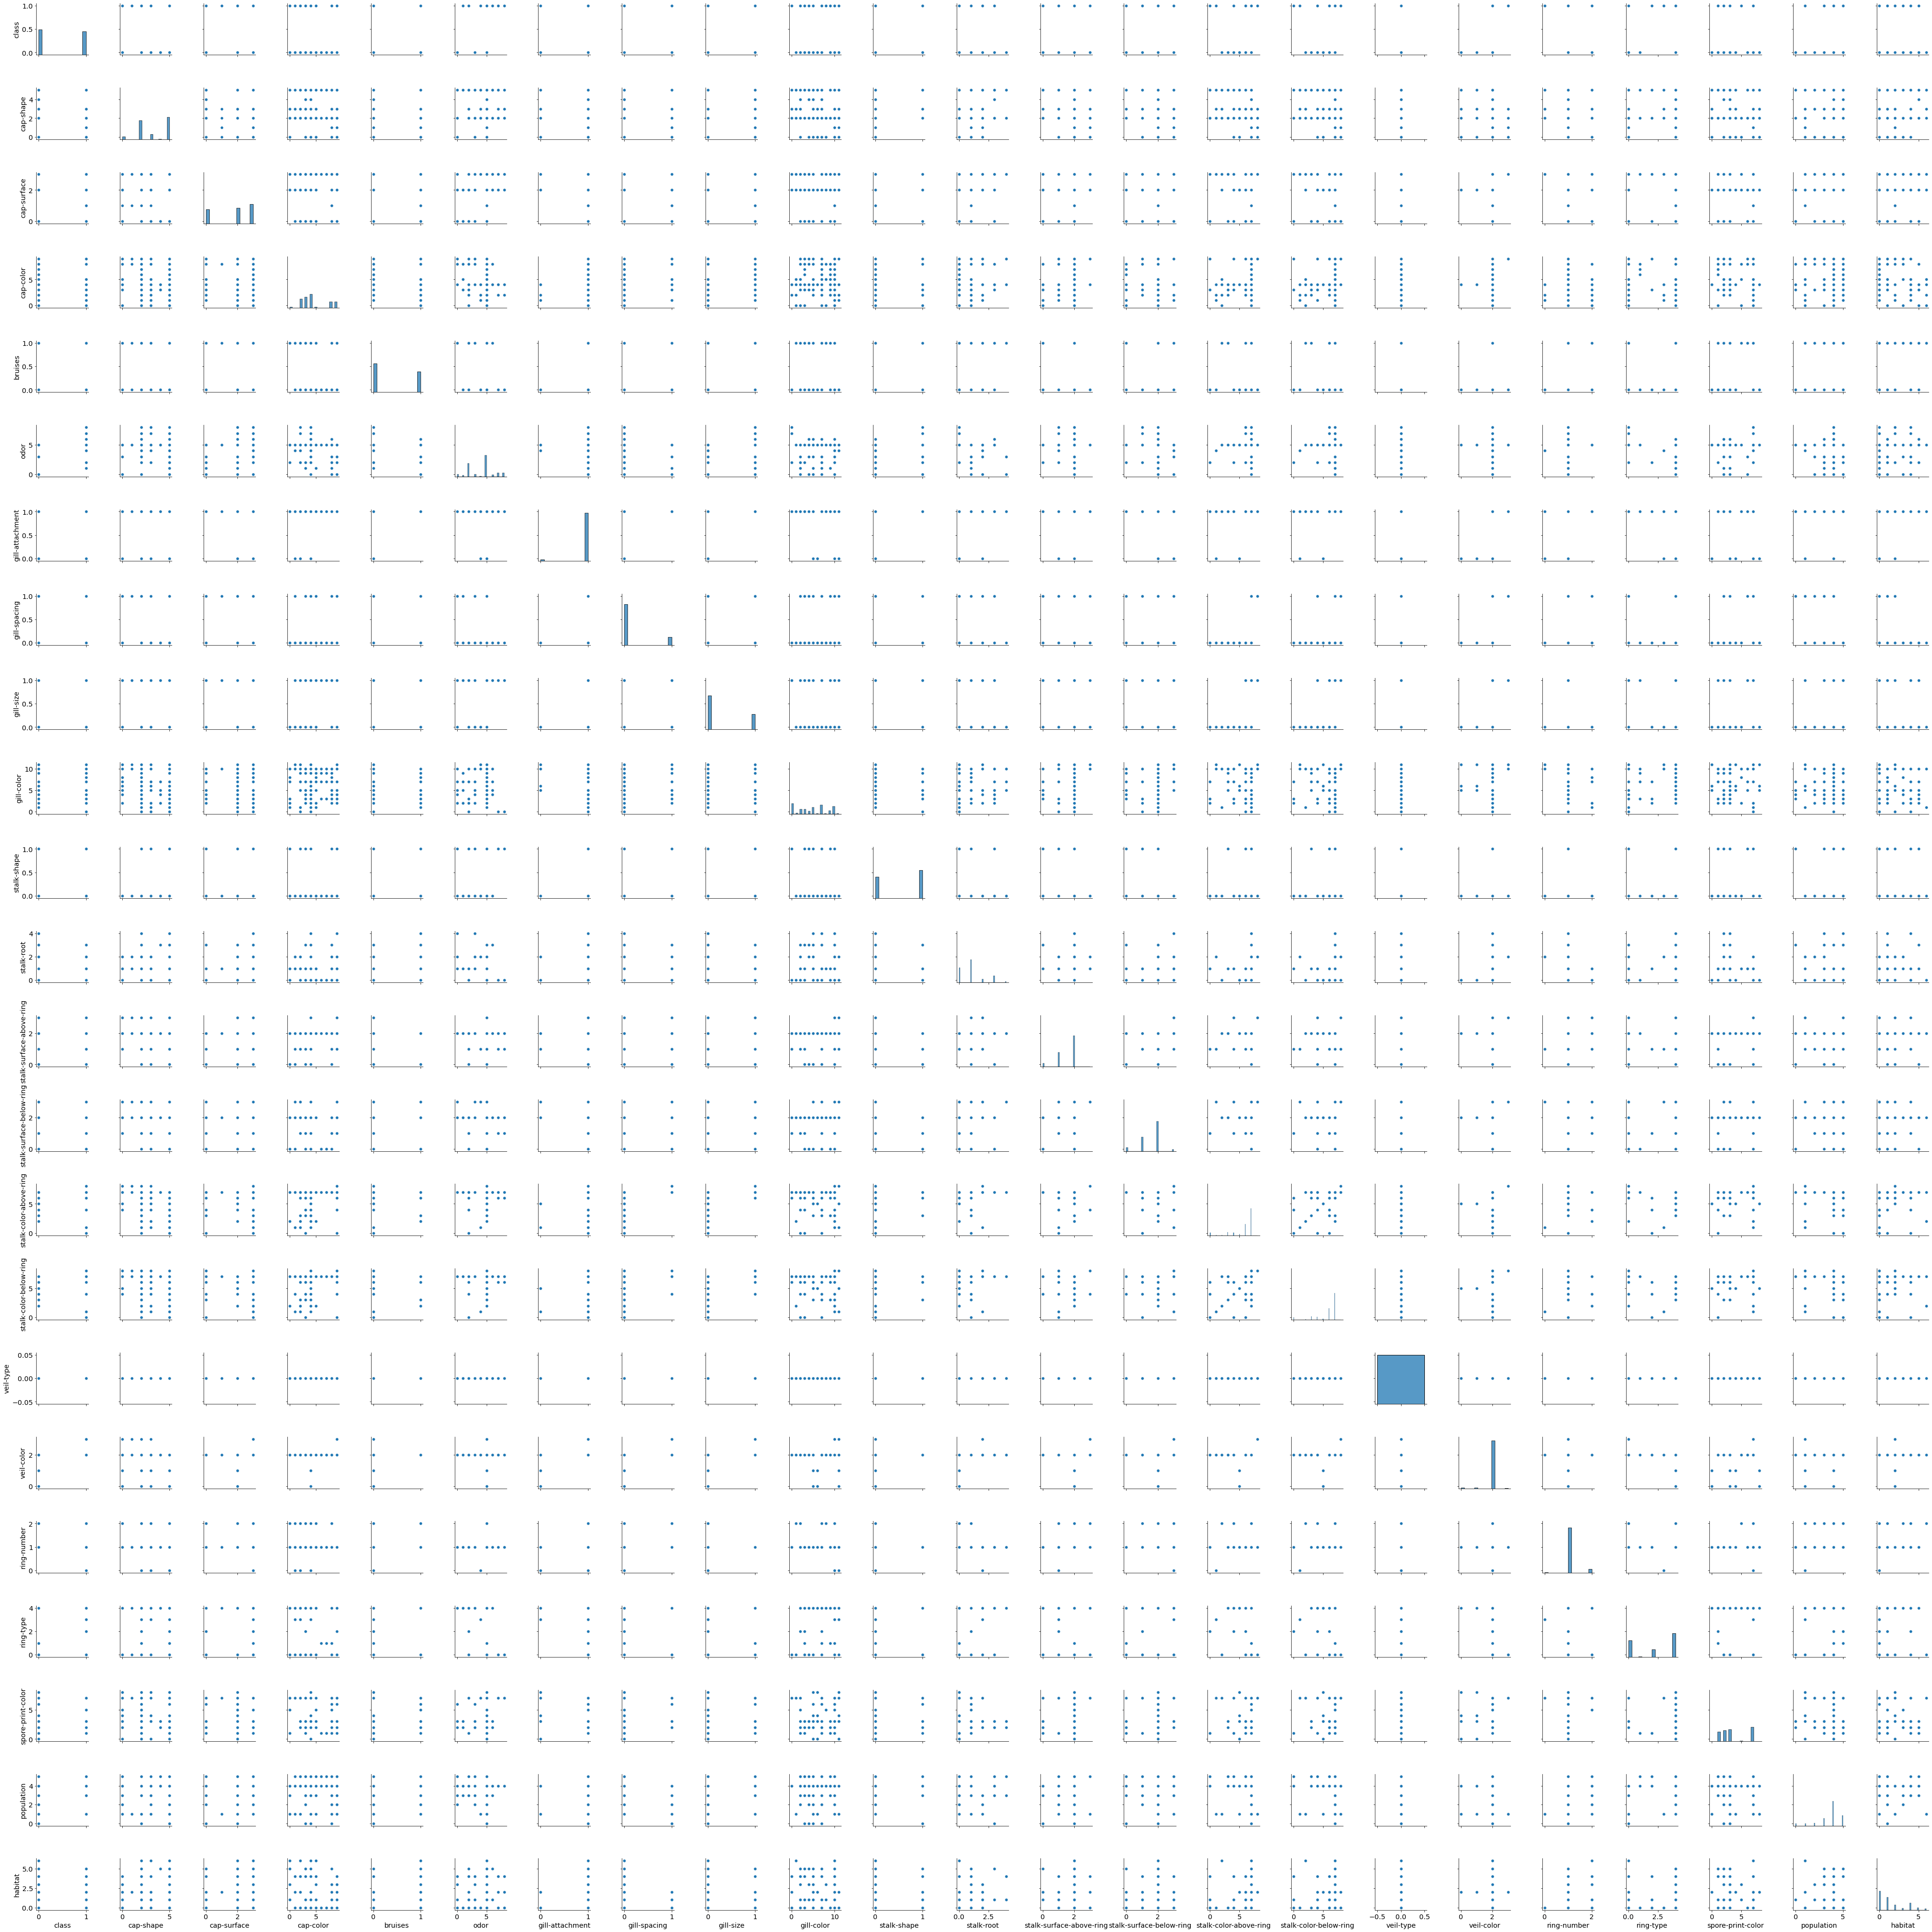

In [ ]:
plt.figure(figsize=(2,1))
sns.pairplot(data,height = 2.5)
plt.show()

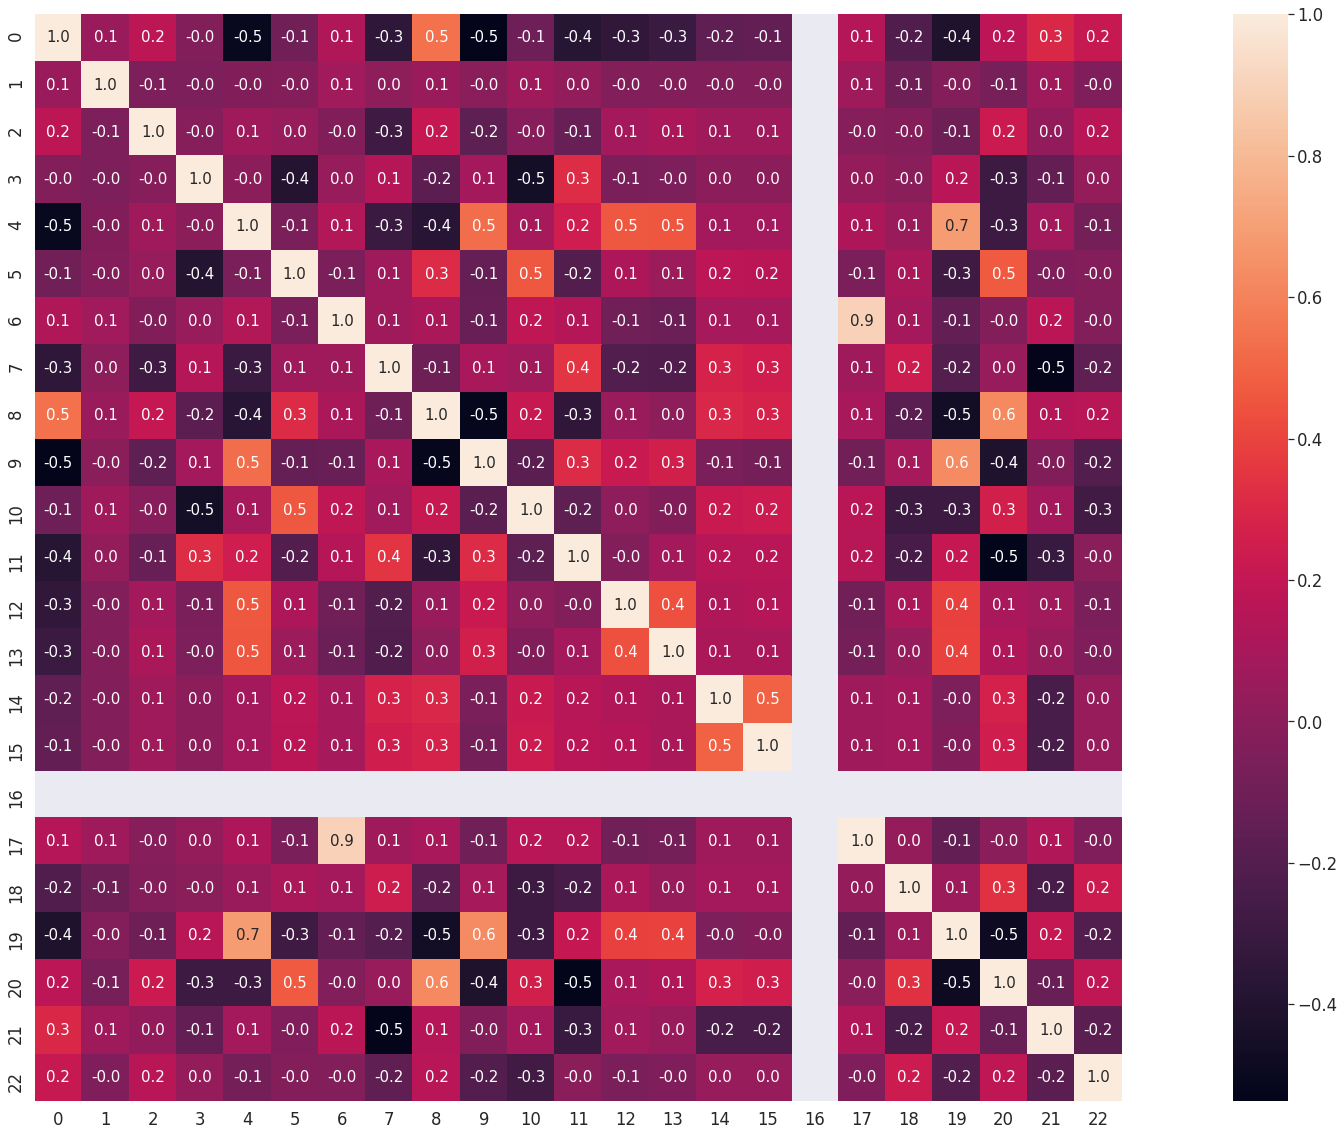

In [ ]:
plt.figure(figsize=(40,20))
cm = np.corrcoef(data.values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,cbar = True , annot=True,square=True,fmt='.1f',annot_kws={'size':15})
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Decision = DecisionTreeClassifier()
Randomforest = RandomForestClassifier(bootstrap=False)
Randomforest.fit(X_train, y_train)
Decision.fit(X_train,y_train)
y_train_pred_Deci = Decision.predict(X_train)
y_test_pred_Deci = Decision.predict(X_test)
y_train_pred = Randomforest.predict(X_train)
y_test_pred = Randomforest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_Deci),mean_squared_error(y_test, y_test_pred_Deci)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred_Deci),r2_score(y_test, y_test_pred_Deci)))

MSE train: 0.000, test: 0.053
R^2 train: 1.000, test: 0.760
MSE train: 0.000, test: 0.053
R^2 train: 1.000, test: 0.760


In [ ]:
Randomforest.score(X_train, y_train)

1.0

In [ ]:
Randomforest.score(X_test, y_test)

1.0

In [ ]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_test_pred)
confusion_matrix

array([[1055,    0],
       [   0,  976]])

In [ ]:
y_prob = Randomforest.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
random_y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
Randomforest.score(X_test, random_y_pred)

1.0

In [ ]:
auc_roc=metrics.classification_report(y_test,random_y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1055\n           1       1.00      1.00      1.00       976\n\n    accuracy                           1.00      2031\n   macro avg       1.00      1.00      1.00      2031\nweighted avg       1.00      1.00      1.00      2031\n'

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

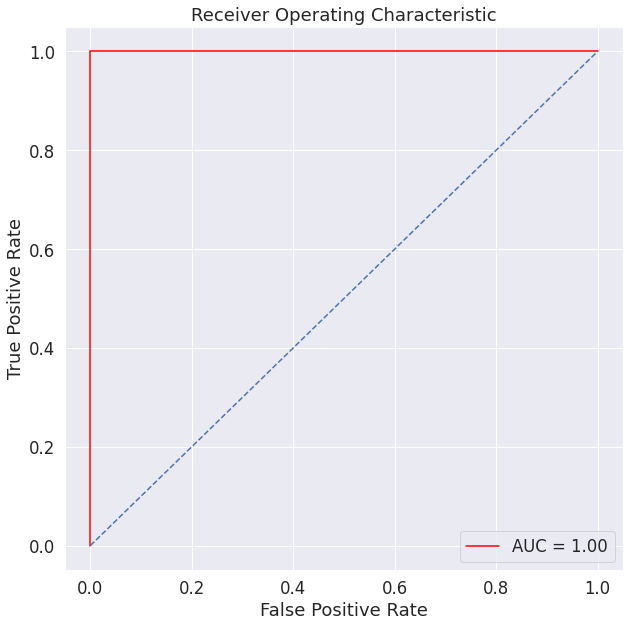

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Ada boosting



In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
 
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,random_state = 7777)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
 
# Predict the response for test dataset
y_pred = model.predict(X_test)
 
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Gradient Boosting Algorithm(GBM)


- 앙상블 방법론 중 부스팅 계열에 속하는 알고리즘

- Tabular format 데이터에 대한 예측에서 엄청난 성능을 보여주고, 머신러닝 알고리즘 중에서 가장 예측 성능이 높다고 알려진 알고리즘

- Kaggle에서의 다수의 우승모델은 XGBoost,LightGBM, CatBoost 같은 파이썬 패키지

- GBM은 계산량이 상당히 많아 필요한 알고리즘이기 때문에, 이를 하드웨어를 효율적으로 구현하는 것이 필요. 위 패키지들은 모두 GBM을 효율적으로 구현하려고 한 패키지

<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/995D67335C46BA4114' width=700 height=300>
</figure>

출처 : https://3months.tistory.com/368#:~:text=Gradient%20Boosting%20Algorithm%20(GBM)%EC%9D%80,%EA%B3%84%EC%97%B4%EC%97%90%20%EC%86%8D%ED%95%98%EB%8A%94%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%9E%85%EB%8B%88%EB%8B%A4.&text=%EA%B7%B8%EB%A0%87%EA%B8%B0%20%EB%95%8C%EB%AC%B8%EC%97%90%20Gradient%20Boosting%20Algorithm%EC%9D%84%20%EA%B5%AC%ED%98%84%ED%95%9C%20%ED%8C%A8%ED%82%A4%EC%A7%80%EB%93%A4%EC%9D%B4%20%EB%A7%8E%EC%8A%B5%EB%8B%88%EB%8B%A4.




- Gradient를 이용하여 Boosting하는 알고리즘


<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/995D67335C46BA4114' width=700 height=300>
</figure>


## GBM의 직관적인 이해

 - 가장 쉬운 방법은 Residual Fitting으로 이해하는 것. 아주 간단한 모델 A를 통해 y를 예측하고 남은 잔차(Residual)을 다시 B라는 모델을 예측을 통해 A+B 모델을 통해 y를 예측한다면 A보다 나은 B 모델을 만들 수 있음.

 - 이러한 방법을 계속하면 잔차는 계속해서 줄어들게 되고, training set을 잘 설명하는 예측 모형을 만들 수 있게 됨.

 - 이러한 방식은 bias는 상당히 줄일 수 있어도, 과적합이 일어날 수 있다는 단점이 있음.

 - GBM을 사용할 때는 Sampling, penalizing 등의 regularizaion 테크닉을 이용하여 더 advanced 된 모델을 이용하는 것이 보편적


<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/99A9FC375C46C0201B' width=700 height=300>
</figure>

출처 :  https://3months.tistory.com/368?category=756964

- 점점 잔차를 줄여나가는 것으로 학습.

<figure>
    <img src='https://miro.medium.com/max/2000/1*xQXPUxSnBd1lOxjLoePoVQ.png' width=700 height=300>
</figure>


## 실습 문제

 - Otto Group Product Classification Challenge (https://www.kaggle.com/c/otto-group-product-classification-challenge)

 - Cardiovascular Disease(https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

## 하이퍼 파라미터

- n_estimator: 결정 트리의 개수.  default는 10, 많을 수록 좋은 성능이 나올 수도 있지만, 무조건적인 것은 아님
- max_features : 데이터의 feature를 참조할 비율, 개수를 뜻합니다. default는 auto입니다.

- max_depth : 트리의 깊이를 뜻함.
- min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수
- min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수
- min_samples_split : 리프노드가 되기 위한 최소한의 샘플 데이터 수




## RandomForest에서의 하이퍼 파라미터와 같음.

## Graident Boosting에서 사용하는 하이퍼 파라미터는 아래와 같음.

- loss : gradient descent에서 사용할 비용 함수. 특별한 이유가 없으면 deafult로 감
-  learning_rate : 값이 너무 적으면 학습이 더디고, 값이 너무 크면 튈 수도 있음.적정한 값을 유지하는 것이 좋음. 
- subsample : weark learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1이며 전체 학습 데이터으로 기반함.0.7이면 70%을 뜻함.


하지만 Gradient Boosting부터는 grid Search 등을 이용해서 hyperparameter tuning 작업을 할 때 주의사항이 있음.

gradient boosting부터는 하이퍼 파라미터가 매우 많기 때문에 하이퍼 파라미터 튜닝 과정에서 시간소모가 크게 작용 됨. 그래서 수행시간이 오래 걸릴 수 있음.



코드 참고)

- Introduction to Machine Learning with Python, Sarah Guido



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer



cancer = load_breast_cancer()



x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 

                                                    stratify=cancer.target, random_state=0)



gbc = GradientBoostingClassifier(random_state=0) # 기본값: max_depth=3, learning_rate=0.1

gbc.fit(x_train, y_train)



score_train = gbc.score(x_train, y_train) # train set 정확도

print('{:.3f}'.format(score_train))

score_test = gbc.score(x_test, y_test) # 일반화 정확도

print('{:.3f}'.format(score_test))

1.000
0.958


Overfitting을 막기 위해 트리의 깊이를 줄여 pre-pruning을 강하게 함.

In [ ]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1)

gbc.fit(x_train, y_train)



score_train_pre = gbc.score(x_train, y_train) # train set 정확도

print('{:.3f}'.format(score_train_pre))


score_test_pre = gbc.score(x_test, y_test) # 일반화 정확도

print('{:.3f}'.format(score_test_pre))


0.995
0.965


learning_rate를 조절

In [ ]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.01) # 기본값 0.1

gbc.fit(x_train, y_train)



score_train_lr = gbc.score(x_train, y_train)

print('{:.3f}'.format(score_train_lr))

score_test_lr = gbc.score(x_test, y_test) 

print('{:.3f}'.format(score_test_lr))

0.995
0.944


위의 결과를 시각화

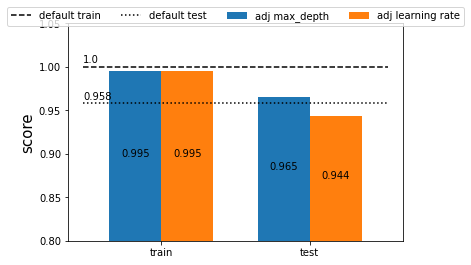

In [ ]:
import matplotlib

import matplotlib.pyplot as plt

import numpy as np



score_set = np.round([score_train, score_test], 3)

max_depth_score_set = np.round([score_train_pre, score_test_pre], 3)

learning_rete_score_set = np.round([score_train_lr, score_test_lr], 3)



index = np.arange(len(score_set))

bar_width = 0.35

bottom = 0.8

list_set = [max_depth_score_set, learning_rete_score_set]

line_set = ['--', ':']

names = ['train', 'test']



for i, line_set, name in zip(index, line_set, names):

    plt.hlines(score_set[i], xmin=0-bar_width,

               xmax=index[-1]+2*bar_width,

               linestyle=line_set, label='default {}'.format(name))

    plt.text(0-bar_width, score_set[i]+0.005, str(score_set[i]))



plt.bar(index, max_depth_score_set, width=bar_width, label='adj max_depth')

plt.bar(index+bar_width, learning_rete_score_set, width=bar_width, label='adj learning rate')

for i, ts, te in zip(index, max_depth_score_set, learning_rete_score_set):

    plt.text(i, (bottom+ts)/2, str(ts), horizontalalignment='center')

    plt.text(i+bar_width, (bottom+te)/2, str(te), horizontalalignment='center')



plt.ylim(bottom, 1.05)

plt.xticks(index+bar_width/2, names)

plt.ylabel('score', size=15)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=False)

plt.show()

max_depth=1일 때 특성 중요도를 시각화 하는 코드는 다음과 같습니다. 

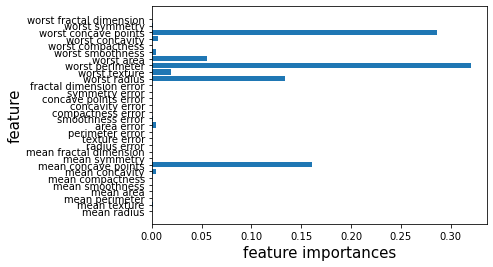

In [ ]:
gbc = GradientBoostingClassifier(max_depth=1, random_state=0)

gbc.fit(x_train, y_train)

n_feature = cancer.data.shape[1]

index=np.arange(n_feature)



plt.barh(index, gbc.feature_importances_, align='center')

plt.yticks(index, cancer.feature_names)

plt.xlabel('feature importances', size=15)

plt.ylabel('feature', size=15)

plt.show() 

# XGBoost :  A scalable Tree Boosting System
(http://dmlc.cs.washington.edu/data/pdf/XGBoostArxiv.pdf)

<figure>
<img src='https://ichi.pro/assets/images/max/724/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg' width=700 height=300>
</figure>




<figure>
    <img src='
https://ichi.pro/assets/images/max/724/1*FLshv-wVDfu-i54OqvZdHg.png' width=700 height=300>
</figure>




출처 : https://soobarkbar.tistory.com/32
## Abstract
- Boosting Tree는 매우 효과적이고 널리 사용되는 머신러닝 방법이다.
- 여기서 XGBoost라는 확장 가능한(scalalbe) End-to-End Tree boosting system을 설명함.

  - 종단간 기계학습(end-to-end machine learning)이라고 한다. 여기서 종단간은 처음부터 끝까지라는 의미로 데이터(입력)에서 목표한 결과(출력)를 사람이 개입 없이 얻는다는 뜻을 담고 있다


 - Sparse한 데이터에 대한 새로운 희소성 인식 알고리즘(Sparsity-Aware Algorithm)과 근사적인 트리 학습(Approximate Tree Learning)을 위한 Weighted Quantile Sketch를 제시

 - Scalable한 트리 부스팅 시스템을 구축하기 위해 캐쉬(cache) 액세스 패턴, 데이터 Compression 및 Sharding에 대한 insight를 제공

 - 이러한 것들을 결합하여, 기존 시스템보다 훨씬 더 적은 자원을 사용하며, 수십 억개 이상의 예제로 Scale함.

## Introduction

- 성공적인 어플리케이션으로 이끈 두 가지의 특성이 있음.
1. 복잡한 데이터 종속성을 포착하는 효율적인(통계적인) 모델 사용.
2. 대규모 Dataset에서 관심 모델을 학습하는 Scalable한 학습 시스템.

이 논문에서는 부스팅 트리에 대해 Scalable한 머신 러닝 시스템인 XGBoost를 설명함.
-> 성공 요인 : 모든 시나리오에서 Scalable하다.
- 단일 머신을 이용하여 기존 솔루션보다 10배 이상 더 빠르게 실행되며, 분산되거나 제한된 메모리 상황에서도 수십억 개 이상의 예제들로 Scalable함.

- XGBoost의 Scalability는 일부 중요한 시스템과 알로리즘적인 최적화 덕분ost의 Scalability는 일부 중요한 시스템과 알로리즘적인 최적화 덕분

## 알고리즘 들여다 보기

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbJCZdx%2FbtqJ6dWIiTH%2FV9zZQu5tEepZkHtFMTmp5K%2Fimg.png' width=700 height=300>
</figure>

XGBoost는 Gradient Boosting 알고리즘을 기반으로 하고 있다.

일반적인 Gradient Boosting과의 차이점은 Training algorithm이 개선되었고, Optimization Technique가 추가 됨

출처 : https://analysisbugs.tistory.com/226?category=840322

### A. Regression Task

ex 문제) Drug Dosage로 Drug Effectiveness를 예측하는 Task을 가지고, 4개의 관측기가 있음.
XGBoost는 초기 예측을 Regression, Classification 모두 Deafult로 0.5의 값을 설정
이제 오차를 계산하고 하나의 Leaf에 전부 집어 넣음.


 - 초기값
<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FEI93S%2FbtqKhkT2ARI%2FUBhkUKDOHBDUGSlUgPTbIk%2Fimg.png' >
</figure>


- a) XGBoost Tree
  - Gradient Boosting에서 Regression Tree는 Gini Index로 Tree를 구성
  - XGBoost Tree는 Similarity Score라는 Index로 Tree를 구성




$ Similarity ~ Score = {\dfrac {{\sum_{i=1}^{n}} Residual_{i}}{{\#} ~of~ Residual+{\lambda}}}$


$Similarity = {\dfrac{ {\sum_{i=1}^{n}} Residual_{i}}{ Previous ~Probability~{\times}~ (1-Previous Probability)+{\lambda}}}$


- Lambda는 Regularization Parameter로 Overfitting을 방지하는 역할

-위의 케이스에 대해서 Tree를 구성해 보면(편의상 Lambda는 0으로 셋팅)

$ Similarity ~ Score = {\dfrac {(-10.5+6.5+7.5-7.50)^2}{4+0}} = 4$

<figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FEI93S%2FbtqKhkT2ARI%2FUBhkUKDOHBDUGSlUgPTbIk%2Fimg.png' >
</figure>, Similarity = 4

- 모든 규칙에 대해서 Gain값을 계산한 후, 가장 높은 Gain 값을 가진 규칙이 선택.


$ Gain = Left_{Similarity}+Right_{Similarity} - Root_{Similarity}$


<figure>
    <img src='https://blog.kakaocdn.net/dn/dcMwi5/btqKfp2B2Yv/yYZKToIRoz0XFik8tN9Xf1/img.png' >
</figure>

위의 경우에서는 gain이 가증 큰 (1) 규칙으로 확장됨.

같은 방식으로 Gain이 음수가 되지 않을 때까지 Tree를 확장하면 다음과 같다.
    

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FQpFAI%2FbtqJ8eufZES%2F7XTDy6S9JuT8YiNNikrcn1%2Fimg.png' >
</figure>


- 이렇게 Tree를 최대한 확장하였으면,  Pruning 작업을 해야한다.

- Regularization parameter Gamma에 대해 Gain-Gamma <0 인 경우 규칙을 Pruning 한다.



 - $~~~~~~~~~~~~~~~~~~~{\Large{Gain-{\gamma} < 0}} $


- 위 경우에서 Gamma를 130으로 정의하면, 첫 번째 규칙의 Gain이 120.33이지만 두 번 째 규칙의 Gain이 140.17이기 때문에 Pruning은 발생하지 않는다.

- 반면에 Gamma를 150으로 정의하면 모든 규칙이 Pruning이 되고, 4개의 오차는 하나의 예측 값으로 예측 됨.


** 만약, Lambda가 0이 아니면 어떻게 될 까? **
-> Leaf에서의 Similiar Score가 달라짐.

-> Gain을 다시 계산해야 됨.

-> Lambda를 높이면 적은 Observation을 가지는 노드를 덜 만들어지게 하는 역할을 함.




- b) Tree Update
-> 최족적으로 Leaf의 Observation이 어떠한 값으로 Update 되는지 알아보면,


<figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FBDXpR%2FbtqJ4H4PiDP%2FzieLWohn7fxkLCTEQyJix0%2Fimg.png' >
</figure>

- Lambda = 0의 경우, 기존 Gradient Boosting과 마찬가지로 평균 값을 반환.


<figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbmbJDk%2FbtqKiaDEsc9%2FJSLg6rGU0HiSg0RkteOE5k%2Fimg.png' >
</figure>


예측 값에 Learning rate를 곱해준 후, 초기 예측 값에 더해주어, Update한다.



<figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbcafPN%2FbtqJ4HqeSCF%2FcAWOBxKJR0IhtcTBPdDK5K%2Fimg.png' >
</figure>

- B. Classification Task

 - 위의 Drug Dosage와 문제는 같음.

 - a) XGBoost Tree
  -
  <figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbgiYUL%2FbtqKfqgcm7p%2FmDtrygjXTkkUFF3SoDSh01%2Fimg.png' >
</figure>

  - Regression Task에서와 마찬가지로, 계산의 편의상 Lambda = 0 으로 설정.
  - <figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcrsKh4%2FbtqKfqgcm63%2FfyhhYXPKOzW0ICCD4wDWGK%2Fimg.png' >
</figure>
  
  - Gain을 최대화하는 방향으로 Tree를 확장해보자.

  -  <figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FnsI4C%2FbtqKdGDyFZQ%2FX96iuVvbrsh3CCUolPk5B1%2Fimg.png' >
</figure>

  - Gamma를 2로 정의하면 두 규칙 모두 남는다.
  

  - Tree Update : Tree가 완성되었으므로, 각 Leaf 별로 Output을 계산해보자.

  - <figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F6uTvW%2FbtqKiawSSOa%2FAmR213PluM9S02i43yblm0%2Fimg.png' >
</figure> 


- 이제 예측값의 Update는 Gradient Boosting for Classification과 마찬가지로 log(odds) 사용

- $ log(odds) = log({\dfrac {p}{1-p}}) = log({\dfrac {0.5}{1-0.5}}) = 0 $

- 예측 값에 Learning rate를 곱해준 후, 초기 예측 값에 더해주어, Update를 한다.

- 예를 들어 Learning rate = 0.8일 경운 다음과 같은 업데이트가 발생.


- <figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FQW3sO%2FbtqKbWfyYyd%2FRBY17aDE63u5oMhTuxRU8K%2Fimg.png' >
</figure>  


  
  

# Mathematical details

- Similarity Score와 Output Value 식을 유도


- Gradient boosting에서 Output Value를 찾기 위해 다음 식을 최소화 하는 다음 식을 최소화 하는 Gamma를 미분으로 찾음


- <figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F0vDU4%2FbtqKiaRbDKw%2Ft6sHOgxKEQ2htIghxesJd0%2Fimg.png' >
</figure>  

- XGBoost는 Regularization term이 추가 되어, 식이 약간 변형이 됨.

- <figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FEv8Z3%2FbtqKhjU8Cw9%2F9fHSyTBl1k0SwONkhcCUt1%2Fimg.png' >
</figure>  


- Gradient boosting에서는 위를 Optimization 하기 위해서 식에 대해서 미분을 하였고, 이 때, Classification에 대해서만, Second Order Taylor Polynomail을 활용.

- XGboost는 Regression 또한 Second Order Taylor Polynomail를 활용.

${\dfrac {d}{d{\gamma}}{\{ \sum_{{x_i}\in R_{ij}} L(y_{i}. F_{m-1}(x_{i}) +{\gamma} + {\dfrac {1}{2}}{\lambda}{\gamma}^2 \}}} = 0$ 을 풀어보자.



${\dfrac {d}{d{\gamma}} L(y_{i},F_{m-1}(x_{i})+\gamma)} \approx {\dfrac{d}{dF(x_{i})}} L(y_{i},F_{m-1}(x_{i})) + {\dfrac{d^2}{dF(x_{i})^2}} L(y_{i},F_{m-1}(x_{i})) (Gradient Boosting)$


### Regression task의 경우 ${\dfrac {d}{d{\gamma}} L(y_{i},F_{m-1}(x_{i})+\gamma)} \approx {\dfrac{d}{dF(x_{i})}} L(y_{i},F_{m-1}(x_{i})) + {\dfrac{d^2}{dF(x_{i})^2}} L(y_{i},F_{m-1}(x_{i}) ) (Gradient Boosting)$


### Regression task의 경우, 손실 함수는 MSE로 정의한다.




- MSE : $L(y_{i}.F_{m-1}) = {\dfrac {1}{2}} (y_{i} - F_{m-1}(x_{i}))^2$


-${\dfrac{d}{dF(x_{i})}} L(y_{i},F_{m-1}(x_{i})) = - L(y_{i},F_{m-1}(x_{i})) = Residual_{i}$

-${\dfrac{d^2}{dF(x_{i})^2}} L(y_{i},F_{m-1}(x_{i})) = 1$


-${\gamma} = {\dfrac {\sum Residual_{i}}{\lambda + n} }$


### Classification task의 경우, 손실 함수는 Cross-Entropy로 정의 됨.

-$L(y_{i}.p_{i}) = y_{i} ~ log(p_{i}) + (1-y_{i}) ~ log(1-p_{i})$


- ${\dfrac{\partial}{\partial p_{i}}} L(y_{i},p_{i} ) = y_{i}{\dfrac{\partial}{\partial p_{i}}} log(p_{i})+(1-y_{i}) {\dfrac{\partial}{\partial p_{i}}} log(1-p_{i}) = {\dfrac{y_{i}}{p_{i}}} - {\dfrac{(1-y_{i})}{(1-p_{i})}} :    $

- ${\dfrac{d^2}{d{p_{i}}^2}} L(y_{i},p_{i} ) = -{\dfrac {y}{p^2}} + {\dfrac {(1-y)}{(1-p)^2}} = {\dfrac{-y(1-p)^2 +p^2(1-y)}{p^2(1-p)^2}} = {\dfrac{-y+2py-yp^2+p^2-p^2y}{p^2(1-p^2)}}$


- ${\gamma} = {\dfrac {\sum Residual_{i}}{\lambda + {\sum \{ p_{i} \times (1-p_{i}) \} }} }$









### XGboost의 하이퍼 파리미터


1. Parameter 종류
 - General Parameter: 전체 기능을 가이드
 - Boost Parameter: 각각의 step에서 booster 가이드
 - Learning Task Parameter: 최적화 수행 가이드
 - General Parameter
 - booster: tree 기반 모델 / 선형 모델
 - silent: 메세지 조절
 - nthread: 병렬 처리 조절
 - Boost Parameter
 - eta: Learning rate(일반적으로 0.01 - 0.2)
 - min_child_weight: min_child_weight를 기준으로 추가 분기 결정(크면  - Underfitting)
 - max_depth: Tree 깊이 수
 - max_leaf_node: 하나의 트리에서 node 개수
 - gamma: split 하기 위한 최소의 loss 감소 정의
 - subsample: 데이터 중 샘플링(0.5 - 1)
 - colsample_bytree: column 중 sampling(0.5 - 1)
 - colsample_bylevel: 각 level마다 샘플링 비율
 - lambda: L2 nrom
 - alpha: L1 norm
 - scale_pos_weight: positive, negative weight 지정 기타 등
2. Learning Task Parameter
 - object: 목적함수 종류
 - binary:logistic(이진 분류)
 - multi:softmax(다중 분류)
 - multi-softprob(다중 확률)
3. eval_metric: 평가 지표
 - rmse – root mean square error
 - mae – mean absolute error
 - logloss – negative log-likelihood
 - error – Binary classification error rate (0.5 threshold)
 - merror – Multiclass classification error rate
 - mlogloss – Multiclass logloss
 - auc: Area under the curve
4. seed(Reproducibility)

 - np.random.seed()




seed를 보편적으로 42를 사용하는 이유가 정말 재미있습니다.

이것은 구글에 Answer to the Ultimate Question of Life, the Universe, and Everything 를 검색해보면 나오는데요.

은하수를 여행하는 히치하이커를 위한 안내서 라는 책에 나온 숫자인데

책 내용 중 삶, 우주, 그리고 모든 것에 대한 답을 얻으려고 deep thought를 찾아가는데 750만년 뒤 다시 자신을 찾아 달라고합니다.

그리고 인간들은 750만년 뒤 다시 찾아가게 되고,  deep thought는 "삶과 우주, 그리고 모든 것에 대한 답은 42입니다." 라고 합니다.

저자가 말하길 42는 그냥 의미 없는 아무 숫자 였다고 하는데 이것이 많은 딥러닝 예제들에서 42를 사용하다 보니 대부분 예제에서 42를 많이 사용하는 모습을 볼 수 있습니다.

# LightGBM

- boosting 알고리즘인 XGboost는 굉장히 좋은 성능을 보여주었지만 여전히 학습시간이 느리다는 단점이 있음.

- 그리고 하이퍼 파라미터도 굉장히 많음

- LightGBM은 대용량 데이터 처리가 가능하고, 다른 모델보다 더 적은 자원(메모리 등)을 사용하고 더욱 빠름.

- GPU도 지원함

- 하지만 너무 적은 수의 데이터를 사용하면 과적합(Overfitting)의 문제가 생김


## LightGBM의 특징

 -  기존의 gradient boosting 알고리즘과 다르게 동작

 - 기존의 boosting 모델들은 트리를 level-wise하게 늘어나는 방법을 사용하였음. Lightgbm은 leaf wise(리프 중심) 트리 분할을 사용.


<figure>
    <img src='
https://blog.kakaocdn.net/dn/r82C1/btqzT495GKp/cJekkdIkbGNfennTj7DyQk/img.jpg' width=700 height=300>
</figure>


- 기존의 트리 들은 트리의 깊이(tree depth)를 줄이기 위해서 level wise(균형 트리) 분할을 사용하였지만 lightgbm은 이것과 다르게 모델이 동작

- level-wise 트리 분석은 균형을 잡아주어야 하기 때문에 tree depth가 줄어듬. 그 대신 그 규현을 잡아주기 위한 연산이 추가 되는 것이 단점.

- lightgbm은 트리의 균형은 맞추지 않고, 리프 노드를 지속적으로 분학하면서 진행

- 이 리프 노드를 max delta loss 값을 가지는 리프 노드를 계속 분할 해 감. 그렇기 때문에 비 대칭적이고 깊은 트리가 생성되지만 동일한 leaf를 생성할때 leaf-wise는 level-wise보다 손실을 줄일 수 있는 장점


### 파라미터 소개

- n_estimators : 반복하려는 트리의 개수

- learning_rate : 학습률

- max_depth : 트리의 학습개수

- min_child_samples : 리프 노드가 되기 위한 최소한의 샘플 데이터 수

- num_leaves :  하나의 트리가 가질 수 있는 최대 리프 개수

- feature_fraction : 트리를 학습할 때마다 선택하는 feature의 비율

- reg_lambda : L2 regularization, reg_alpga : L1 regularization


- lightgbm도 xgboost와 마찬가지로 early stopping을 지원함.

In [ ]:
!pip install lightgbm

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

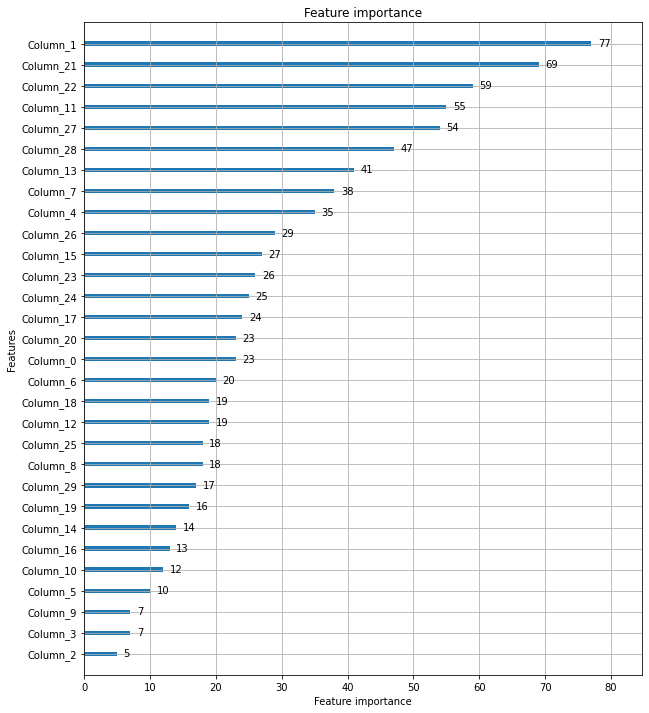

In [ ]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from lightgbm import plot_importance
import matplotlib.pyplot as plt

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)
lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:1]

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)
plt.show()

# Catboost


- Catboost란 Yandex에서 개발된 오픈 소스 Machine Learning이다. 이 기술은 다양한 데이터 형태를 활용하여 기업이 직면한 문제들을 해결하는데 도움을 준다. 특히 분류 정확성에서 높은 점수를 제공한다.

- Catboost는 Category와 Boosting을 합쳐서 만들어진 이름이다.
여기에서 Boost는 Gradient boosting machine learnin algorithm에서 온 말인데 Gradient boosting은 추천 시스템, 예측 등 다양한 분야에서 활용되어지는 강력한 방법이고 Deep Learning과 달리 적은 데이터로도 좋은 결과를 얻을 수 있는 효율적인 방법이다.

## Category features 사용의 편리성

- Category features를 사용하기 위해서는 One-Hot-Encoding등 데이터를 전처리할 필요가 있었지만 Catboost에서는 사용자가 다른 작업을 하지 않아도 자동으로 이를 변환하여 사용한다. 이 분야를 공부한 경험이 있다면 이 기능이 얼마나 편리한지를 알 수 있을 것이다.


### 빠른 예측

- GBDT에 보다는 더 오래 걸리는 대신에 예측 시간이 13-16배 정도 더 빠르다.

- default parameters값으로 더 나은 성능
hyper-parmeter tuning을 하지 않더라도 기본적인 세팅으로도 좋은 결과를 얻을 수 있어 활용성이 뛰어나다.

# 실습(신용카드 탐지 (https://www.kaggle.com/mlg-ulb/creditcardfraud))

## imblanced data 처리

### Under Sampling(언더 샘플링)

1. 무작위 추출 : 무작위로 정상 데이터를 일부만 선택

2. 유의 정보 : 유의한 데이터만을 남기는 방식

- 언더 샘플링의 경우 데이터의 소실이 매우 크고, 떄로는 중요한 정상 데이터를 잃게 될 수도 있다.
<figure>
    <img src='
https://mkjjo.github.io/img/posting/2019-01-04-001-undersampling.PNG' width=700 height=300>
</figure>

출처 : https://mkjjo.github.io/


### Over Sampling(오버 샘플링)

1. 무작위 추출 : 무작위로 소수 데이터를 복제

2. 유의 정보 : 사전에 기준을 정해서 소수 데이터를 복제

**정보가 손실되지 않는다**는 정점이 있으나, 복제된 관측치를 원래 데이터 세트에 추가하기 만하면 여러 유형의 관측치를 다수 추가하여 Ovefitting을 초래 할 수 있다.

이러한 경우 train set의 성능은 높으나 testset의 성능은 나빠질 수 있다.

3. 합성 데이터 생성 : 소수 데이터를 단순 복제하는 것이 아니라 새로운 복제본을 만듬.

<figure>
    <img src='
https://mkjjo.github.io/img/posting/2019-01-04-001-oversampling.PNG' width=700 height=300>
</figure>

출처 : https://mkjjo.github.io/


### SMOTE(synthetic minority oversampling technique)

- 합성 소수 샘플링 기술로 다수 클래스를 샘플링하고 기존 소수 샘플을 보간하여 새로운 소수 인스턴스를 합성해냄.


<figure>
    <img src='
https://miro.medium.com/max/2760/0*DfTZFQO5nhdiYmiY.png' width=700 height=300>
</figure>

- Over,Under 샘플링은 데이터 중복으로 인한 과적합 문제와 데이터 손실 해결

- 수가 적은 클래스의 점을 하나 선택해 K개의 가까운 데이터 샘플 찾아 그 사이에 새로운 점을 생성

- 장점 : 데이터 손실이 없으며 임의의 over sampling을 했을 경우 과적합 완화

- 부스스트래핑이나 KNN 모델 기법을 활용

- SMOTE 알고리즘은 오버샘플링 기법 중 합성 데이터를 생성하는 방식으로 가장 많이 사용하는 모델

- 새로운 사례의 데이터 예측엔 취약


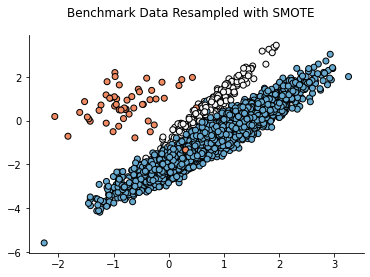

In [ ]:
import seaborn as sns
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

import matplotlib.pyplot as plt
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


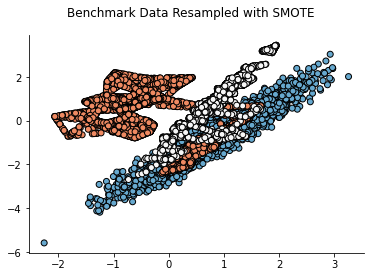

In [ ]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass